In [88]:
%load_ext autoreload
%autoreload 2
from JW import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
data = pd.read_csv("../dat/Reformat_GSE137986/GSM4189614_0713cL.tsv", delimiter="\t", index_col=0)
#data = pd.read_csv("../dat/Reformat_GSE137986/GSM4096261_10t.tsv", delimiter="\t", index_col=0)

In [6]:
data.head(2)

,41x14,41x15,41x16,41x17,41x18,41x19,41x20,41x21,41x22,41x23,...,42x35,42x36,42x37,42x38,42x39,42x40,42x41,42x42,42x43,42x44
Gm37363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm37686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data.shape

(18787, 1789)

In [8]:
pca = PCA(n_components=40, svd_solver='arpack')
X = pca.fit_transform(data)
print(X.shape)

(18787, 40)


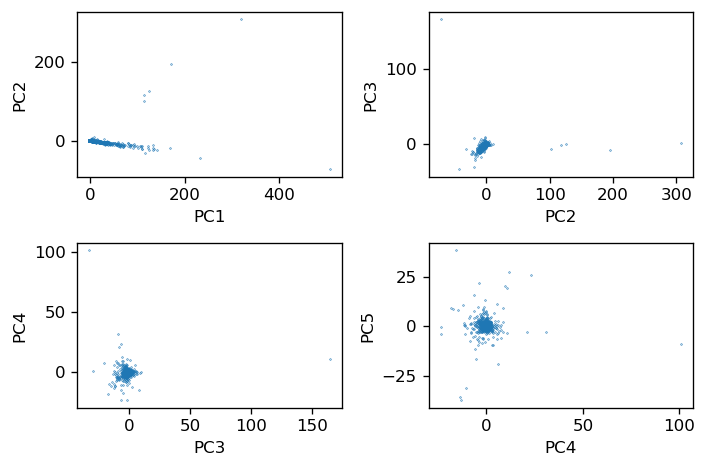

In [9]:
fig, axs = plt.subplots(2,2,dpi=120)
for i,(j,k) in enumerate([(0,0),(0,1),(1,0),(1,1)]):
    axs[j,k].scatter(X[:,i], X[:,i+1], s=0.1)
    axs[j,k].set_xlabel("PC%d"%(i+1))
    axs[j,k].set_ylabel("PC%d"%(i+2))
fig.tight_layout()
plt.show()

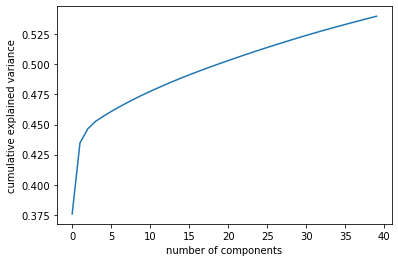

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [11]:
tsne = TSNE(n_components=2)
Y = tsne.fit_transform(X[:, :20])

In [12]:
X_df = pd.DataFrame(data = X, index=data.index)
X_df.shape

(18787, 40)

In [13]:
Y_df = pd.DataFrame(data = Y, index=data.index, columns=['tsne1', 'tsne2'])
Y_df.shape

(18787, 2)

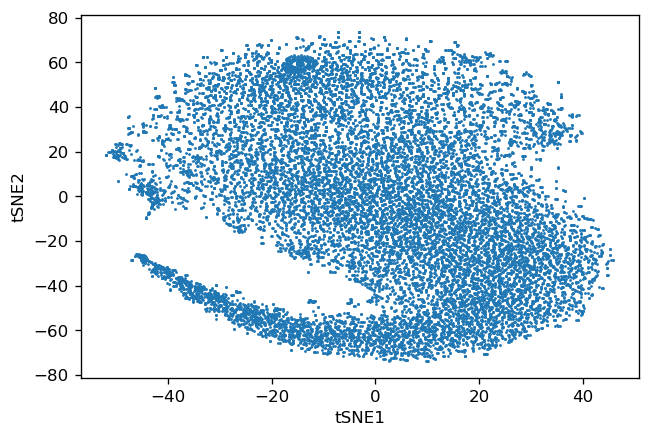

In [14]:
fig = plt.figure(dpi=120)
ax = plt.subplot(111)
ax.scatter(Y[:,0], Y[:,1],s=0.5)
ax.set_xlabel("tSNE1")
ax.set_ylabel("tSNE2")
plt.show()

In [21]:
SIFRI_gene = pd.read_csv("../SFARI.genes.csv")
HF1 = SIFRI_gene[SIFRI_gene["gene.score"].isin([1])]
HF2 = SIFRI_gene[SIFRI_gene["gene.score"].isin([1, 2])]
sfari_mouse_1 = [x for x in HF1["mouse.gene.name"].values if x==x]
sfari_mouse_12 = [x for x in HF2["mouse.gene.name"].values if x==x]
index_kept1 = list(set(Y_df.index).intersection(set(sfari_mouse_1)))
index_kept2 = list(set(Y_df.index).intersection(set(sfari_mouse_12)))
Y1 = Y_df.loc[index_kept1, :]
Y2 = Y_df.loc[index_kept2, :]
print(HF1.shape, Y1.shape)
print(HF2.shape, Y2.shape)

NameError: name 'Y_df' is not defined

In [16]:
Y1

,tsne1,tsne2
Ankrd11,-32.791981,-48.388153
Sin3a,25.679497,-65.104378
Kmt2e,-36.709198,-43.694302
Phf21a,-13.321529,-66.509102
Cacna1a,23.783655,-23.484291
...,...,...
Iqsec2,-18.256470,24.462477
Adnp,28.699457,33.290394
Ubr1,36.490303,-28.571686
Deaf1,34.546566,-55.433884


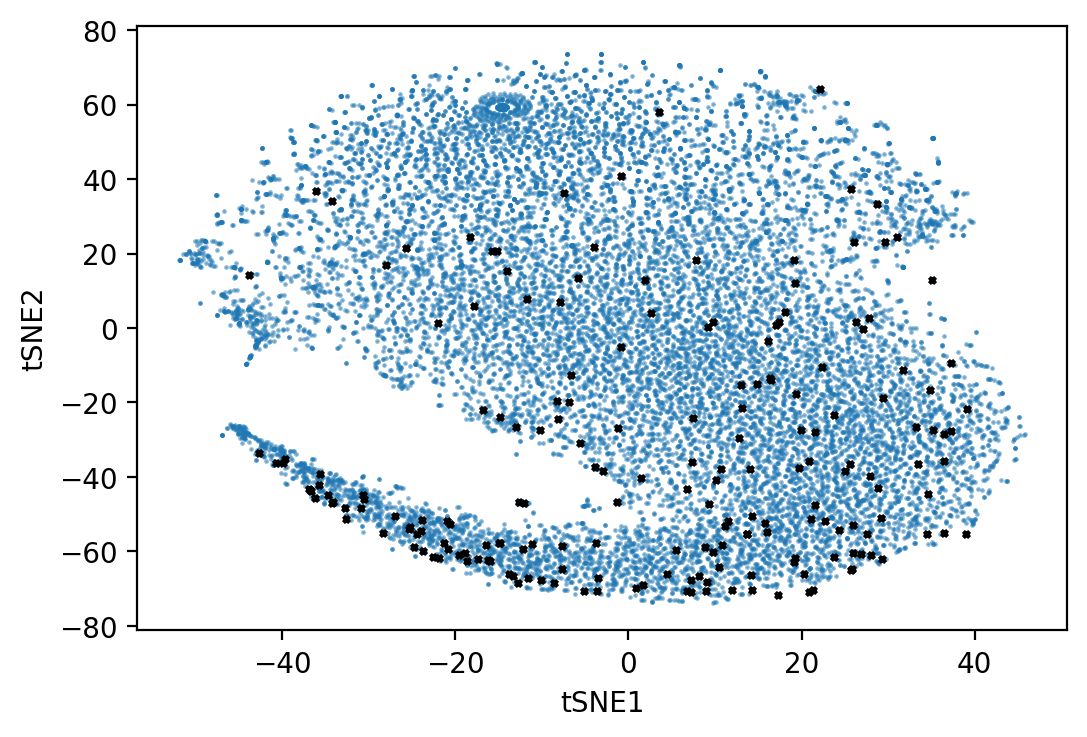

In [24]:
fig = plt.figure(dpi=200)
ax = plt.subplot(111)
ax.scatter(Y[:,0], Y[:,1], s=0.5, alpha=0.5)
ax.scatter(Y1.values[:,0], Y1.values[:,1],s=5, color="black", marker="x")
ax.set_xlabel("tSNE1")
ax.set_ylabel("tSNE2")
plt.show()

In [18]:
index_kept1 = list(set(X_df.index).intersection(set(sfari_mouse_1)))
index_kept2 = list(set(X_df.index).intersection(set(sfari_mouse_12)))
X1 = X_df.loc[index_kept1, :]
X2 = X_df.loc[index_kept2, :]
print(HF1.shape, X1.shape)
print(HF2.shape, X2.shape)

(207, 11) (195, 40)
(418, 11) (378, 40)


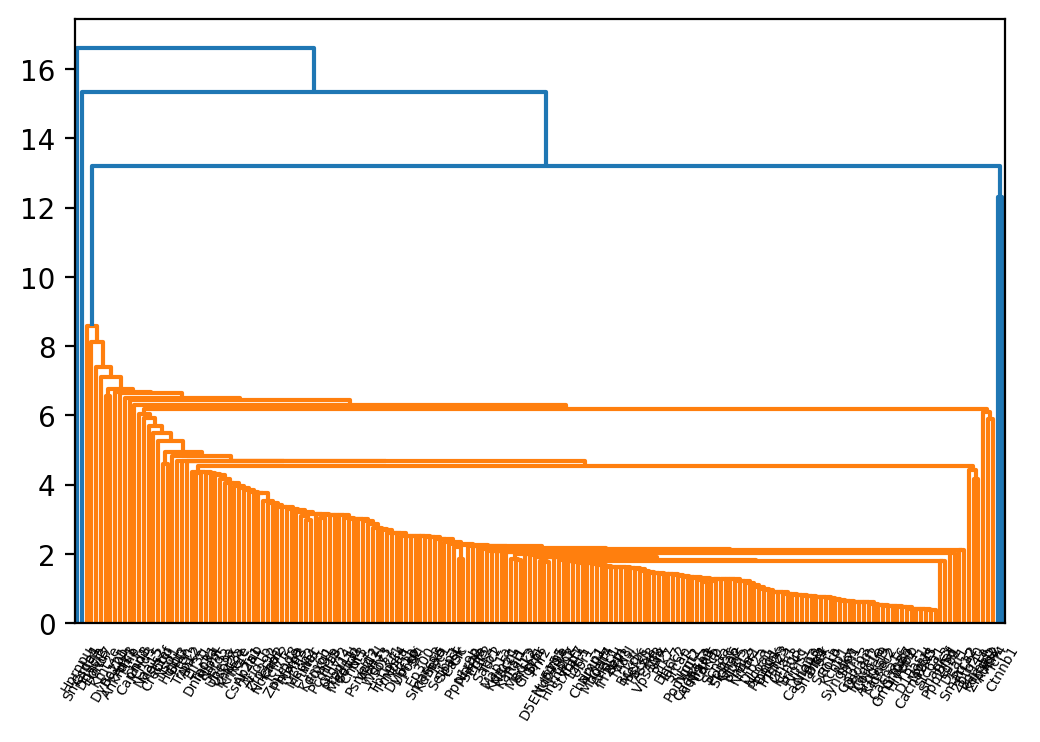

In [19]:
linked2 = linkage(X1, method='single', metric='euclidean')
plt.figure(dpi=200)
dendrogram(linked2,
            orientation='top',
            labels=X1.index.values,
            distance_sort='descending',
            show_leaf_counts=True)
plt.xticks(rotation=60)
plt.show()

In [25]:
np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [26]:
np.arange(50)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [29]:
data

,41x14,41x15,41x16,41x17,41x18,41x19,41x20,41x21,41x22,41x23,...,42x35,42x36,42x37,42x38,42x39,42x40,42x41,42x42,42x43,42x44
Gm37363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm37686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Xkr4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm38148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sox17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt-Nd5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
mt-Nd6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mt-Cytb,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,5.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
mt-Tt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
chd8 = data.transpose()["Chd8"]

In [5]:
chd8

41x14    0.0
41x15    0.0
41x16    0.0
41x17    0.0
41x18    0.0
        ... 
42x40    0.0
42x41    0.0
42x42    0.0
42x43    0.0
42x44    0.0
Name: Chd8, Length: 1789, dtype: float64

<ipython-input-15-c369e0681dcb>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(X, Y, grids, cmap='OrRd')


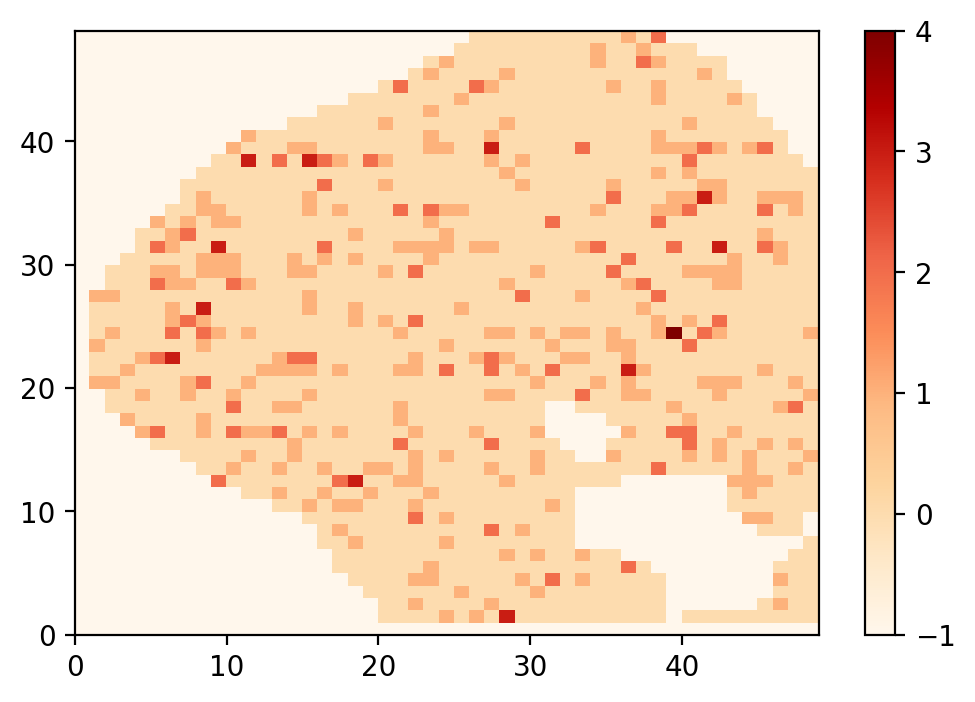

In [15]:
def PlotGrid(grid_df):
    grids = np.zeros((50, 50))
    X = np.arange(50)
    Y = np.arange(50)
    for i in range(0, 50, 1):
        for j in range(0, 50, 1):
            grid = "{}x{}".format(i, j)
            if grid in grid_df.index:
                #ax.scatter(i, j, s=0.5)
                grids[i, j] = grid_df[grid]
            else:
                grids[i, j] = -1
    fig = plt.figure(dpi=200)
    ax = plt.subplot(111)
    c = ax.pcolormesh(X, Y, grids, cmap='OrRd')
    fig.colorbar(c, ax=ax)

PlotGrid(chd8)

In [87]:
data.head(2)

,41x14,41x15,41x16,41x17,41x18,41x19,41x20,41x21,41x22,41x23,...,42x35,42x36,42x37,42x38,42x39,42x40,42x41,42x42,42x43,42x44
Gm37363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm37686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
dataZ = []
for gene, row in data.iterrows():
    Z_row = ZscoreConverting(row.values)
    dataZ.append(Z_row)
dataZ = pd.DataFrame(data=dataZ, index=data.index.values, columns=data.columns.values)

D:\Coursework\ML_Genomics\FinalProj\ML_project\Code\JW.py:78: RuntimeWarning: invalid value encountered in double_scalars


In [90]:
dataZ.head(2)

,41x14,41x15,41x16,41x17,41x18,41x19,41x20,41x21,41x22,41x23,...,42x35,42x36,42x37,42x38,42x39,42x40,42x41,42x42,42x43,42x44
Gm37363,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,...,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649
Gm37686,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,...,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649,-0.023649


In [91]:
dataT = dataZ.transpose()

In [92]:
dataT.head(2)

,Gm37363,Gm37686,Xkr4,Gm38148,Sox17,Gm6085,Gm2053,Gm6123,Mrpl15,Lypla1,...,mt-Atp6,mt-Co3,mt-Nd3,mt-Nd4l,mt-Nd4,mt-Nd5,mt-Nd6,mt-Cytb,mt-Tt,mt-Tp
41x14,-0.023649,-0.023649,-0.023649,-0.033454,-0.05801,-0.262155,-0.033454,-0.047338,-0.201858,-0.212348,...,-0.840871,-1.129696,-0.397183,-0.12255,-1.012109,-0.527282,-0.130856,-0.117307,-0.05294,-0.091954
41x15,-0.023649,-0.023649,-0.023649,-0.033454,-0.05801,-0.262155,-0.033454,-0.047338,-0.201858,-0.212348,...,-0.840871,1.360019,-0.397183,-0.12255,-0.247148,-0.527282,-0.130856,-0.117307,-0.05294,-0.091954


In [93]:
SIFRI_gene = pd.read_csv("../SFARI.genes.csv")
HF1 = SIFRI_gene[SIFRI_gene["gene.score"].isin([1])]
HF2 = SIFRI_gene[SIFRI_gene["gene.score"].isin([1, 2])]
sfari_mouse_1 = [x for x in HF1["mouse.gene.name"].values if x==x]
sfari_mouse_12 = [x for x in HF2["mouse.gene.name"].values if x==x]
index_kept1 = list(set(dataT.columns.values).intersection(set(sfari_mouse_1)))

In [94]:
index_kept = list(set(dataT.columns.values).intersection(set(asd_asc_50_mouse)))

In [100]:
Dat = []
for i, row in dataT.iterrows():
    asd_row = row[index_kept]
    dat = np.mean(asd_row)
    Dat.append(dat)

In [101]:
xx = pd.Series(Dat, index=dataT.index)

<ipython-input-146-27118894e7b8>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(Y, X, grids, cmap='OrRd')


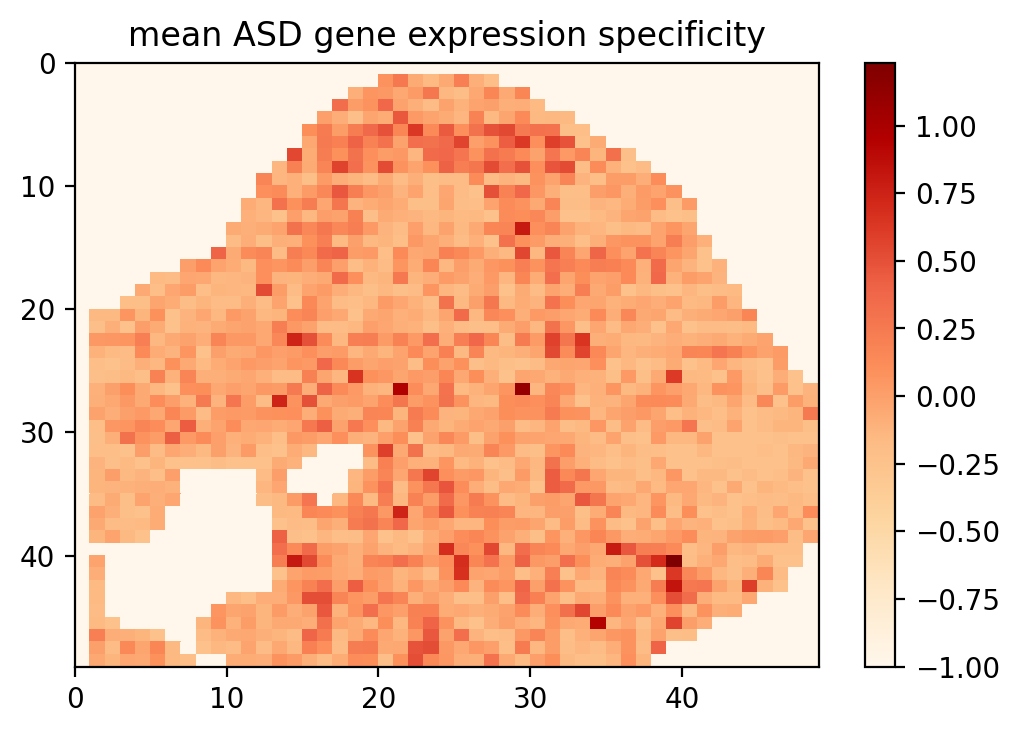

In [146]:
def PlotGrid(grid_df):
    grids = np.zeros((50, 50))
    X = np.arange(50)
    Y = np.arange(50)
    for i in range(0, 50, 1):
        for j in range(0, 50, 1):
            grid = "{}x{}".format(i, j)
            if grid in grid_df.index:
                #ax.scatter(i, j, s=0.5)
                grids[j, i] = grid_df[grid]
            else:
                grids[j, i] = -1
    fig = plt.figure(dpi=200)
    ax = plt.subplot(111)
    c = ax.pcolormesh(Y, X, grids, cmap='OrRd')
    plt.gca().invert_yaxis()
    fig.colorbar(c, ax=ax)
    plt.title("mean ASD gene expression specificity")
    return plt 
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('All_ASD_Genes.pdf')
plt = PlotGrid(xx)
pp.savefig()
pp.close()

In [77]:
ASC = pd.read_csv("../dat/asc_tada_RR.csv")

In [78]:
top_asd_gene = ASC.head(50)["gene"].values

In [79]:
top_asd_gene

array(['CHD8', 'SCN2A', 'SYNGAP1', 'ADNP', 'FOXP1', 'POGZ', 'ARID1B',
       'SUV420H1', 'DYRK1A', 'SLC6A1', 'GRIN2B', 'PTEN', 'SHANK3',
       'MED13L', 'GIGYF1', 'CHD2', 'ANKRD11', 'ANK2', 'ASH1L', 'TLK2',
       'DNMT3A', 'DEAF1', 'CTNNB1', 'KDM6B', 'DSCAM', 'SETD5', 'KCNQ3',
       'SRPR', 'KDM5B', 'WAC', 'SHANK2', 'NRXN1', 'TBL1XR1', 'MYT1L',
       'BCL11A', 'RORB', 'RAI1', 'DYNC1H1', 'DPYSL2', 'AP2S1', 'KMT2C',
       'PAX5', 'MKX', 'GABRB3', 'SIN3A', 'MBD5', 'MAP1A', 'STXBP1',
       'CELF4', 'PHF12'], dtype=object)

In [80]:
asd_asc_50_mouse = SIFRI_gene[SIFRI_gene["gene.symbol"].isin(top_asd_gene)]["mouse.gene.name"].values
asd_asc_50_mouse = [x for x in asd_asc_50_mouse if x==x]

In [81]:
asd_asc_50_mouse[:5]

['Adnp', 'Ank2', 'Ankrd11', 'Ap2s1', 'Arid1b']

In [151]:
def PlotGrid(grid_df, title="ASD genes Spatial Expression Fraction"):
    grids = np.zeros((50, 50))
    X = np.arange(50)
    Y = np.arange(50)
    for i in range(0, 50, 1):
        for j in range(0, 50, 1):
            grid = "{}x{}".format(i, j)
            if grid in grid_df.index:
                #ax.scatter(i, j, s=0.5)
                grids[j, i] = grid_df[grid]
            else:
                grids[j, i] = -2
    fig = plt.figure(dpi=200)
    ax = plt.subplot(111)
    c = ax.pcolormesh(X, Y, grids, cmap='OrRd', vmin=-2, vmax=8)
    plt.gca().invert_yaxis()
    fig.colorbar(c, ax=ax)
    plt.title(title)
    return plt

In [152]:
dataT.head(2)

,Gm37363,Gm37686,Xkr4,Gm38148,Sox17,Gm6085,Gm2053,Gm6123,Mrpl15,Lypla1,...,mt-Atp6,mt-Co3,mt-Nd3,mt-Nd4l,mt-Nd4,mt-Nd5,mt-Nd6,mt-Cytb,mt-Tt,mt-Tp
41x14,-0.023649,-0.023649,-0.023649,-0.033454,-0.05801,-0.262155,-0.033454,-0.047338,-0.201858,-0.212348,...,-0.840871,-1.129696,-0.397183,-0.12255,-1.012109,-0.527282,-0.130856,-0.117307,-0.05294,-0.091954
41x15,-0.023649,-0.023649,-0.023649,-0.033454,-0.05801,-0.262155,-0.033454,-0.047338,-0.201858,-0.212348,...,-0.840871,1.360019,-0.397183,-0.12255,-0.247148,-0.527282,-0.130856,-0.117307,-0.05294,-0.091954


In [153]:
#print(dataT.values.max())
"""
maxx, minx = 0, 0
for i in dataT.index.values:
    for j in dataT.columns.values:
        if dataT.loc[i,j] != dataT.loc[i,j]:
            continue
        if dataT.loc[i,j] > maxx:
            maxx = dataT.loc[i,j]
        if dataT.loc[i,j] < minx:
            minx = dataT.loc[i,j]
print(maxx, minx)
"""

'\nmaxx, minx = 0, 0\nfor i in dataT.index.values:\n    for j in dataT.columns.values:\n        if dataT.loc[i,j] != dataT.loc[i,j]:\n            continue\n        if dataT.loc[i,j] > maxx:\n            maxx = dataT.loc[i,j]\n        if dataT.loc[i,j] < minx:\n            minx = dataT.loc[i,j]\nprint(maxx, minx)\n'

<ipython-input-151-124b171ae46e>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(X, Y, grids, cmap='OrRd', vmin=-2, vmax=8)
<ipython-input-151-124b171ae46e>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(dpi=200)


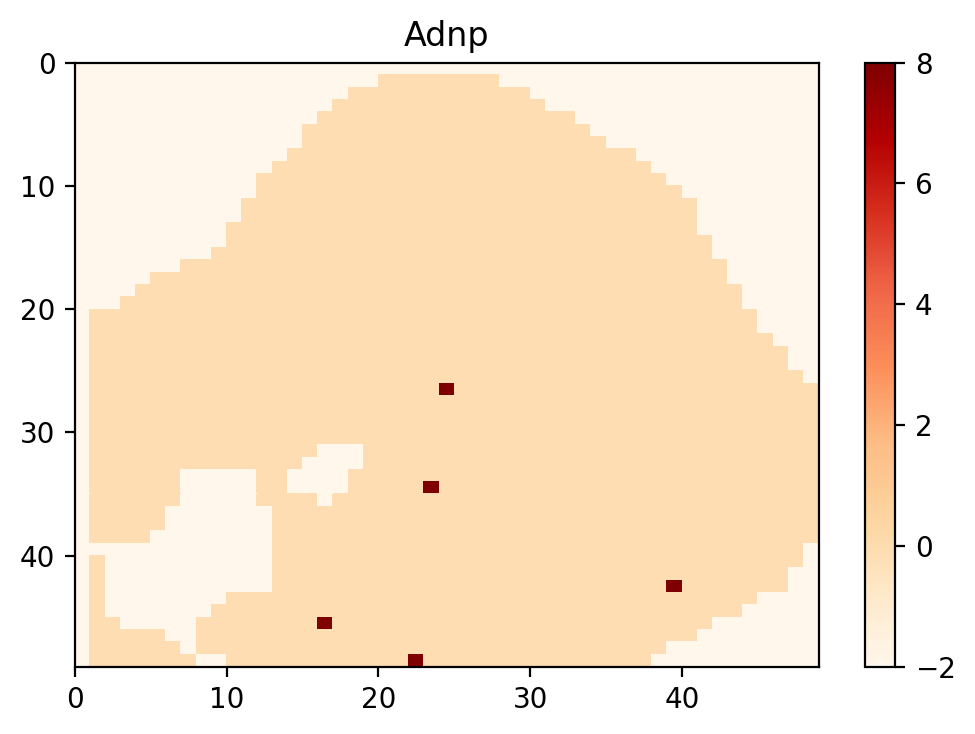

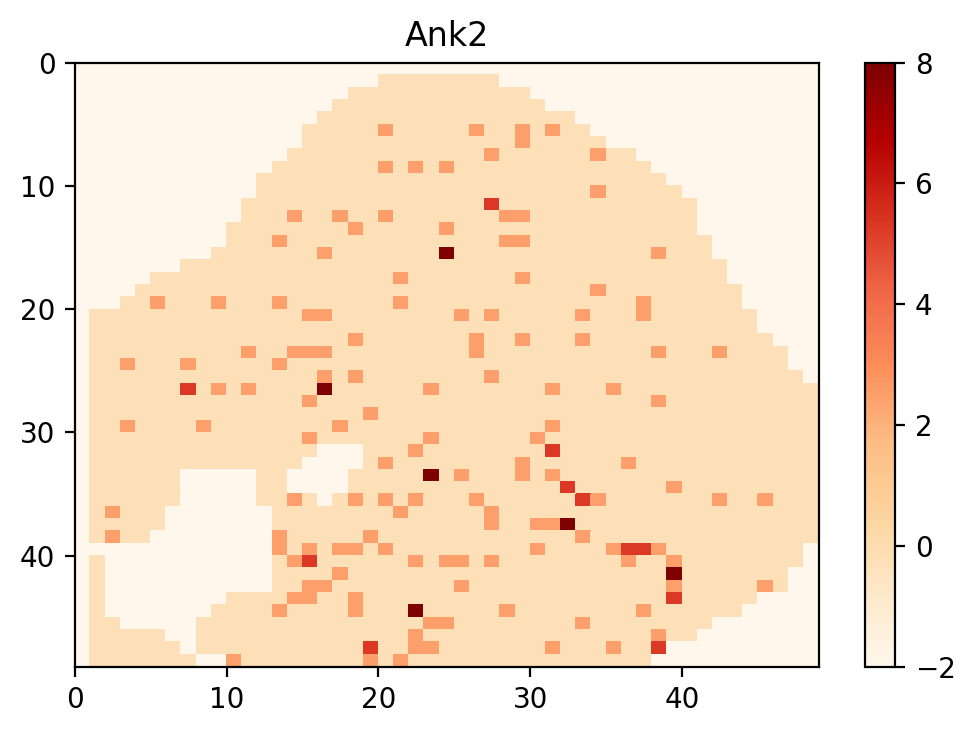

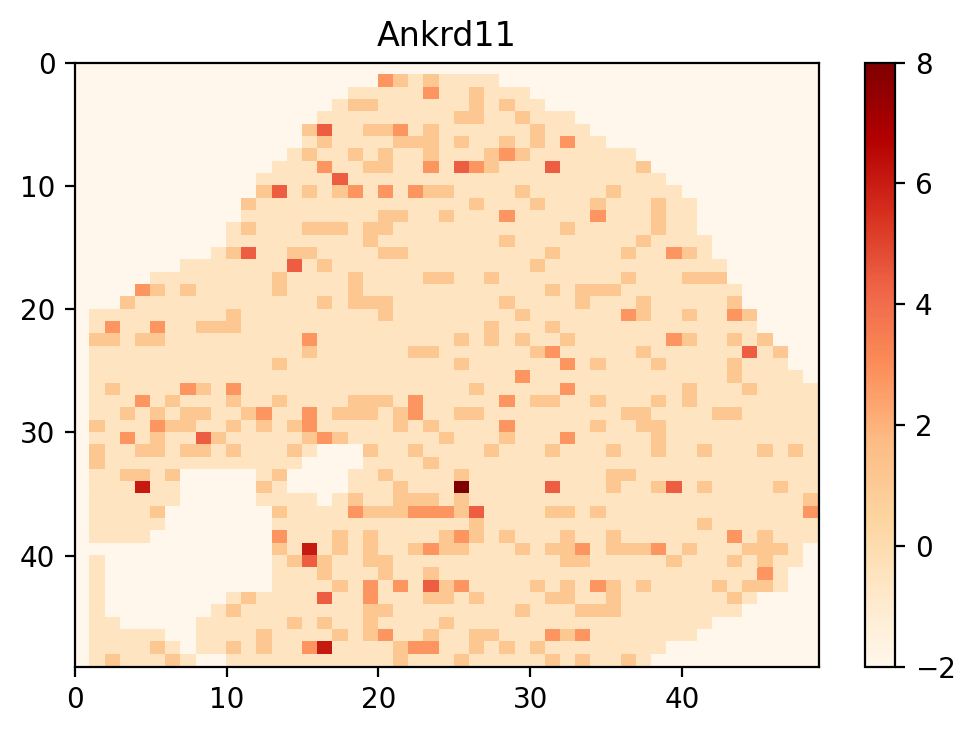

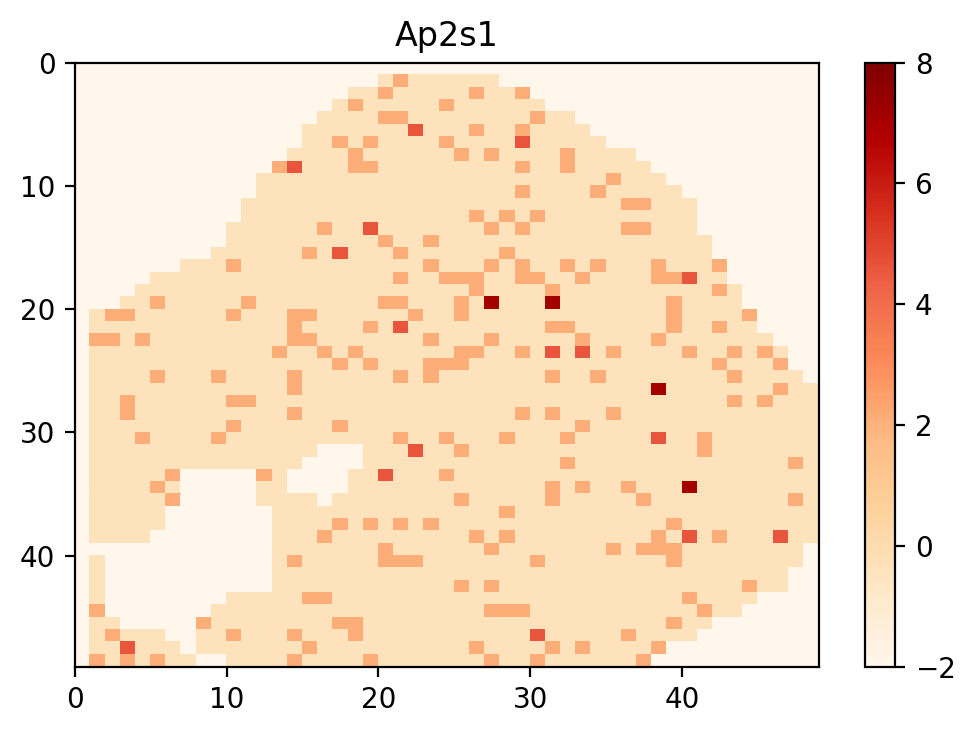

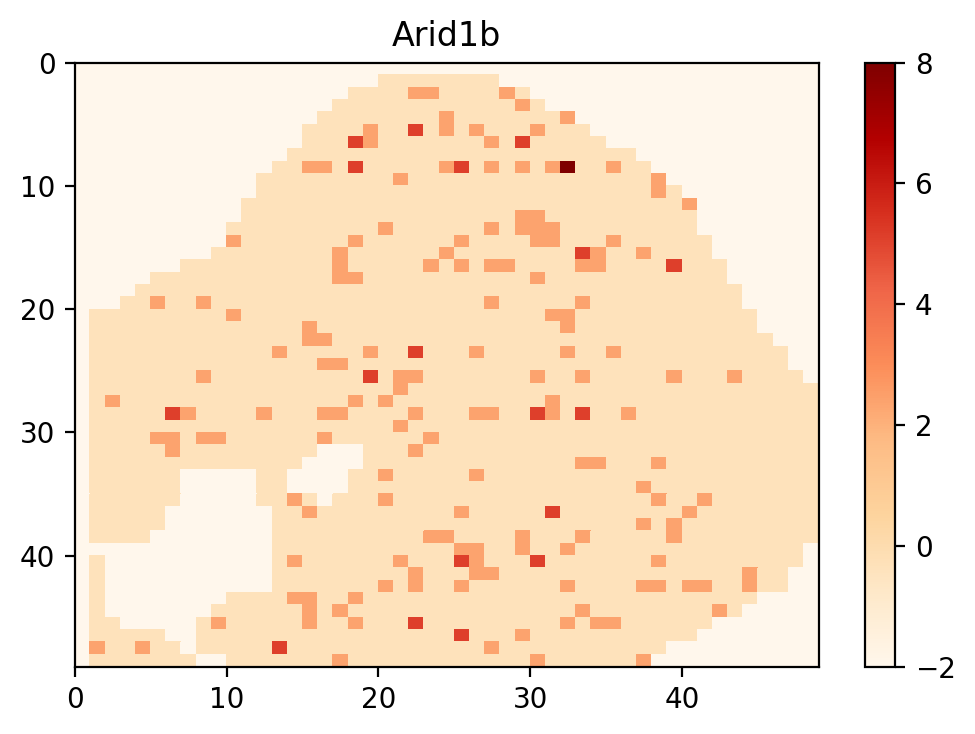

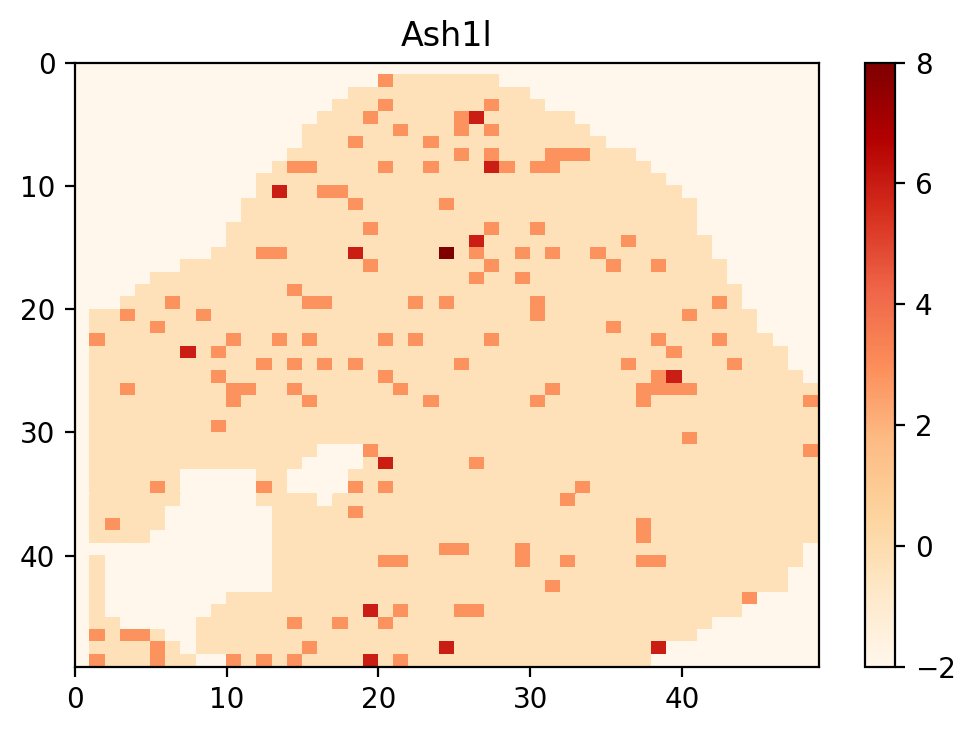

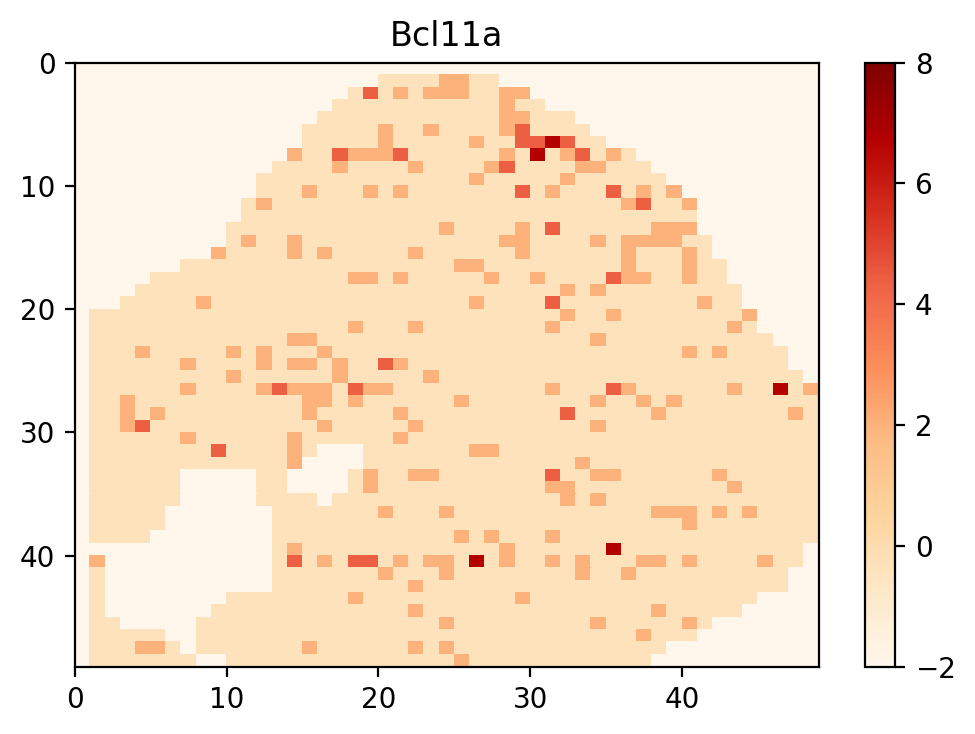

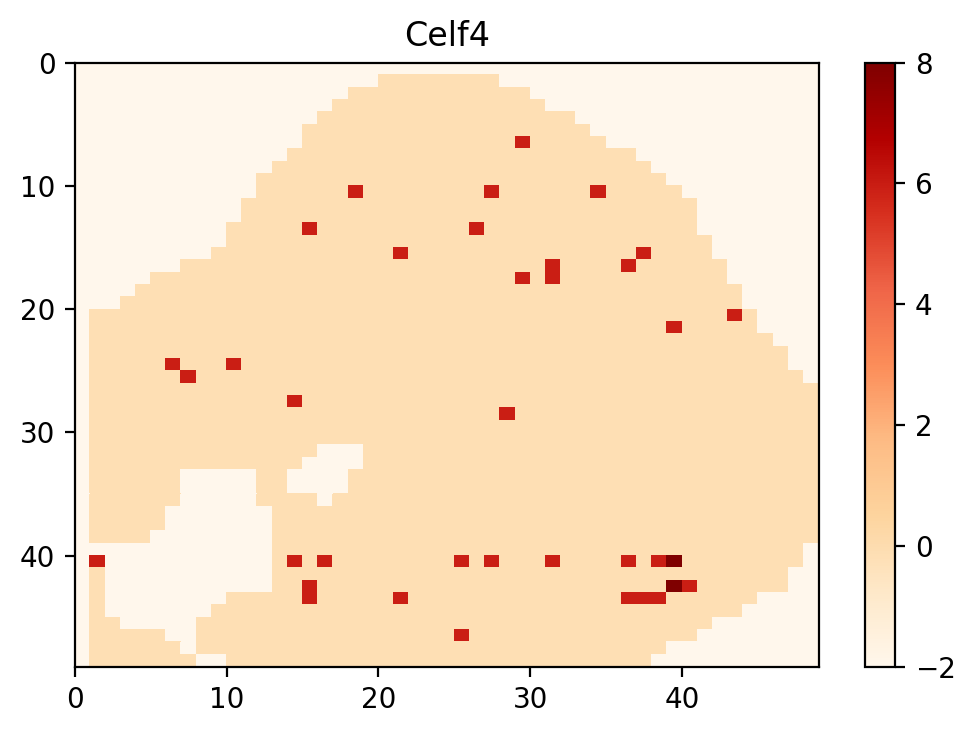

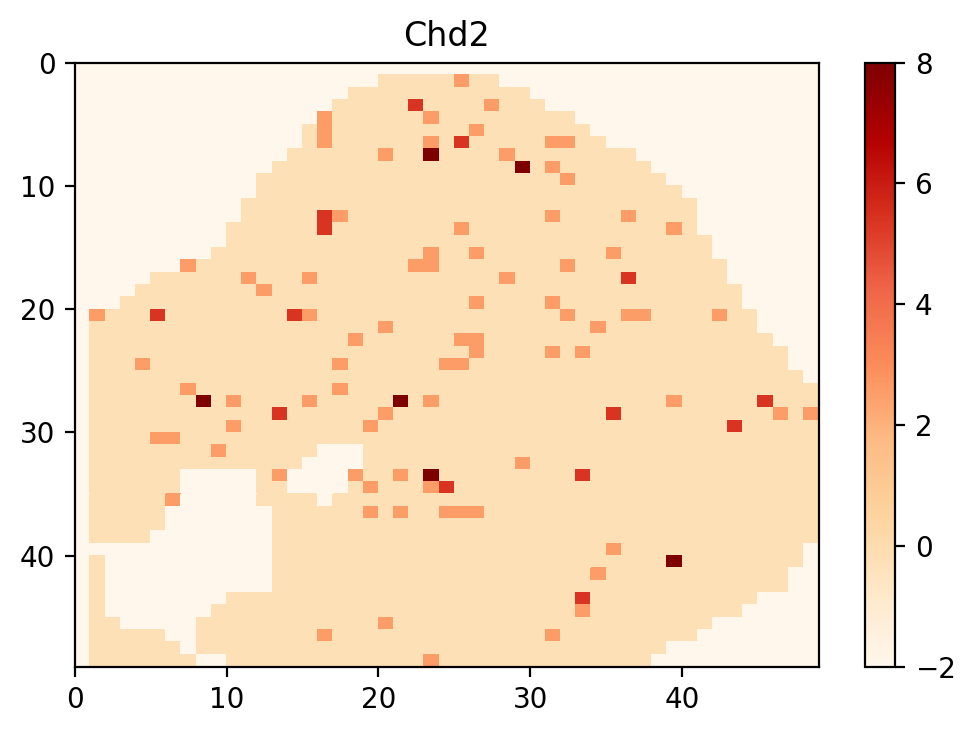

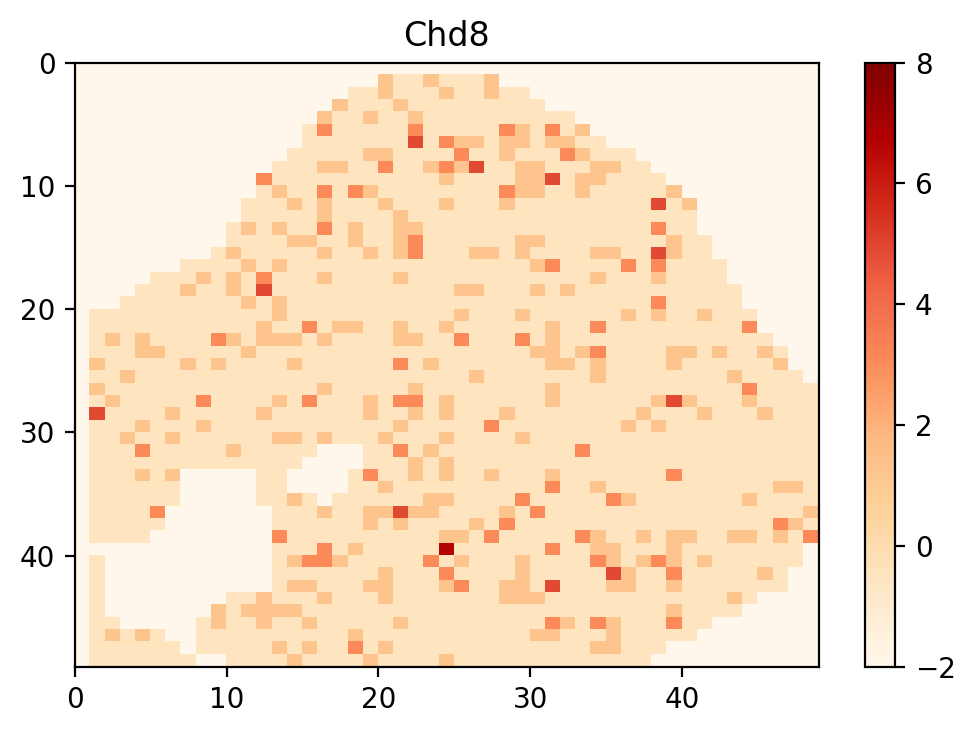

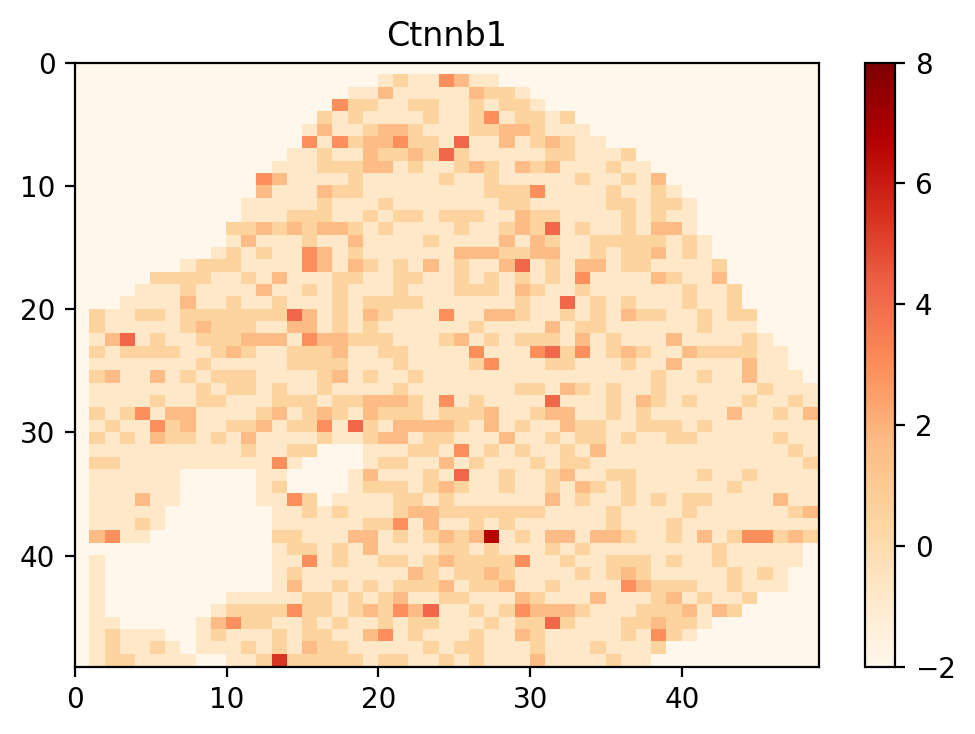

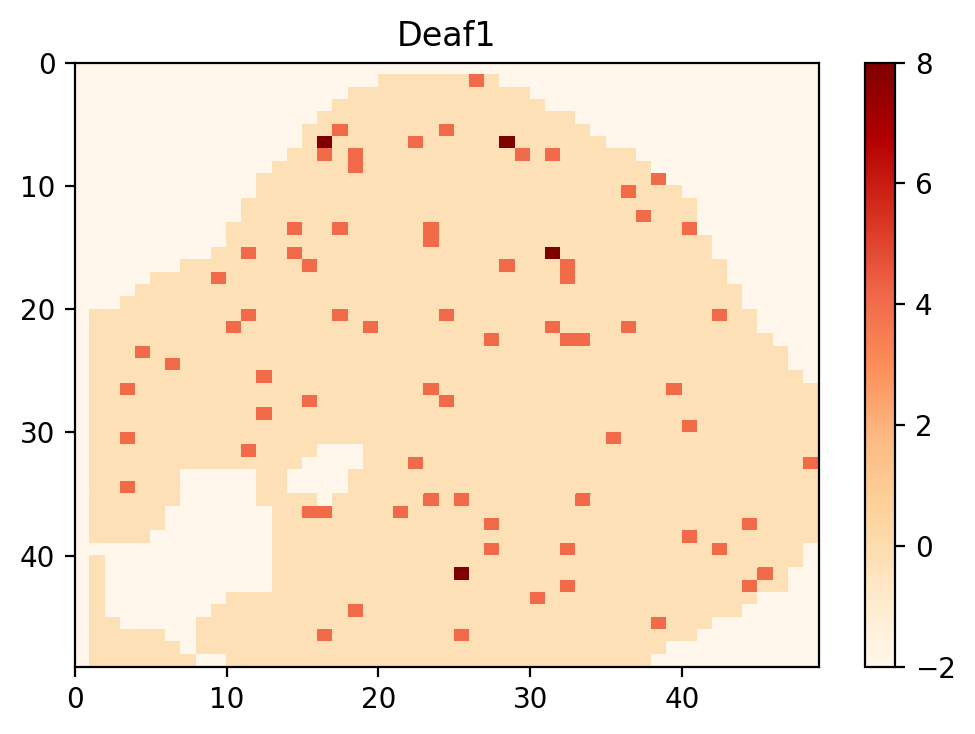

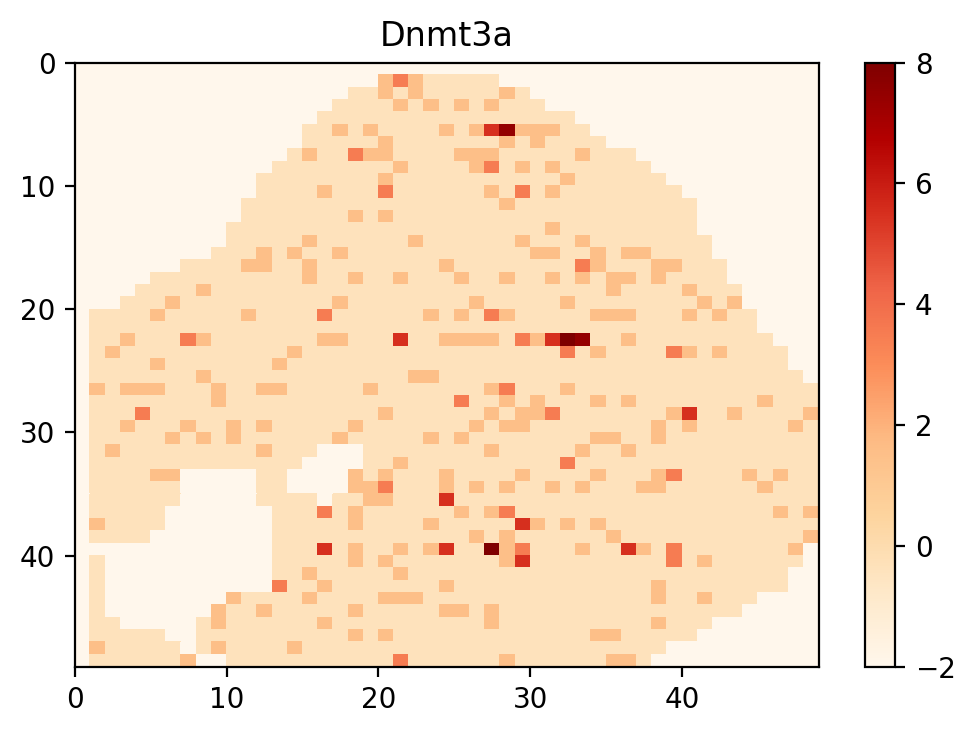

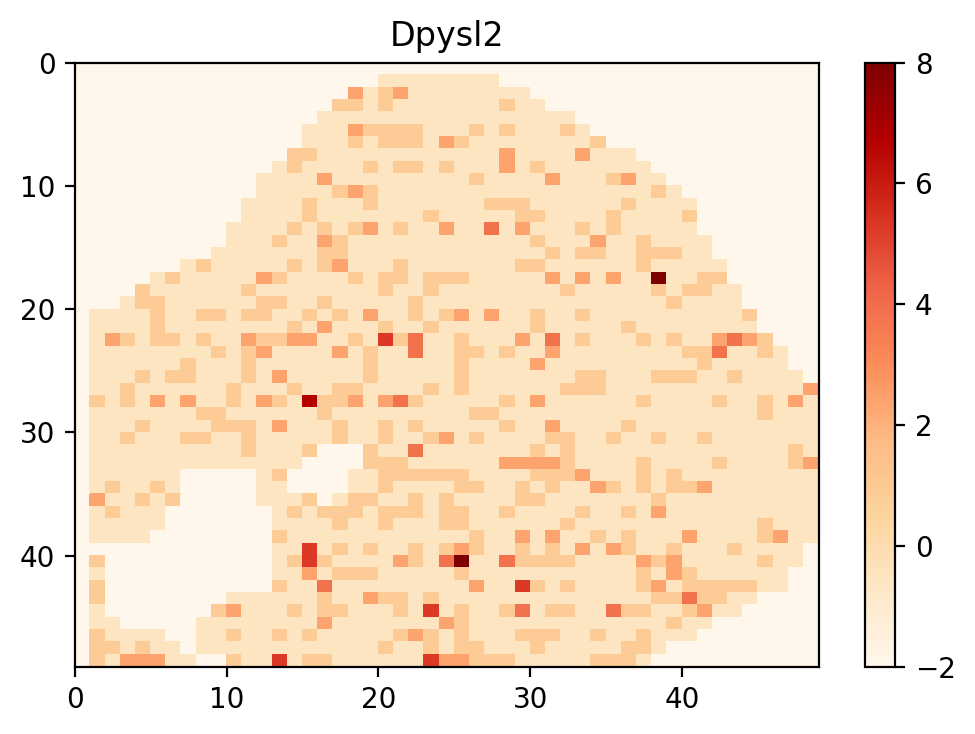

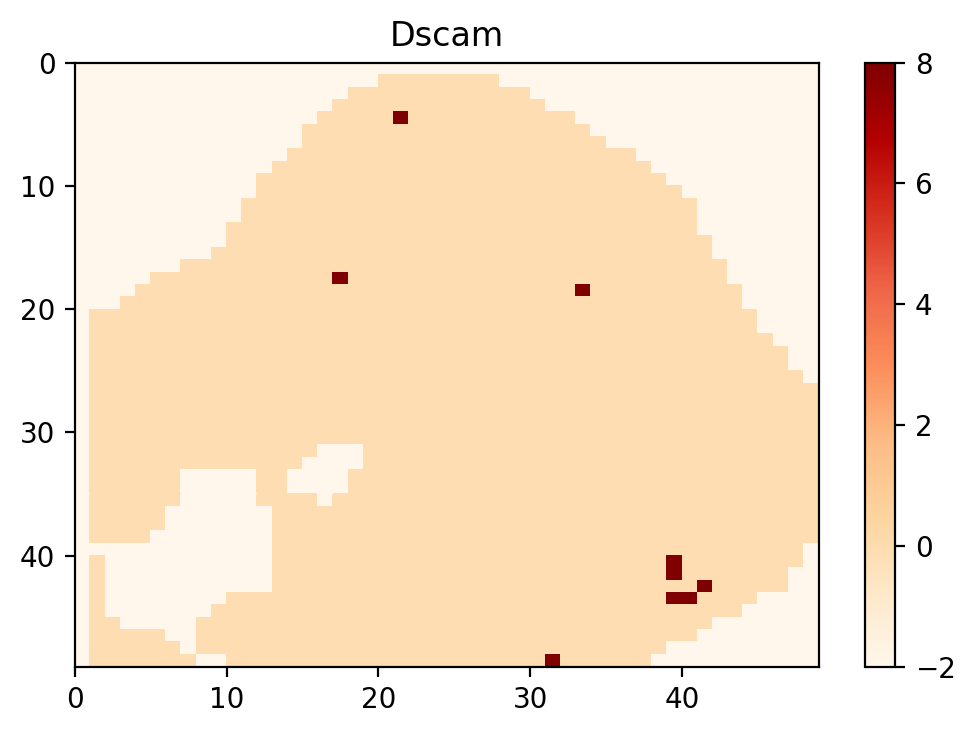

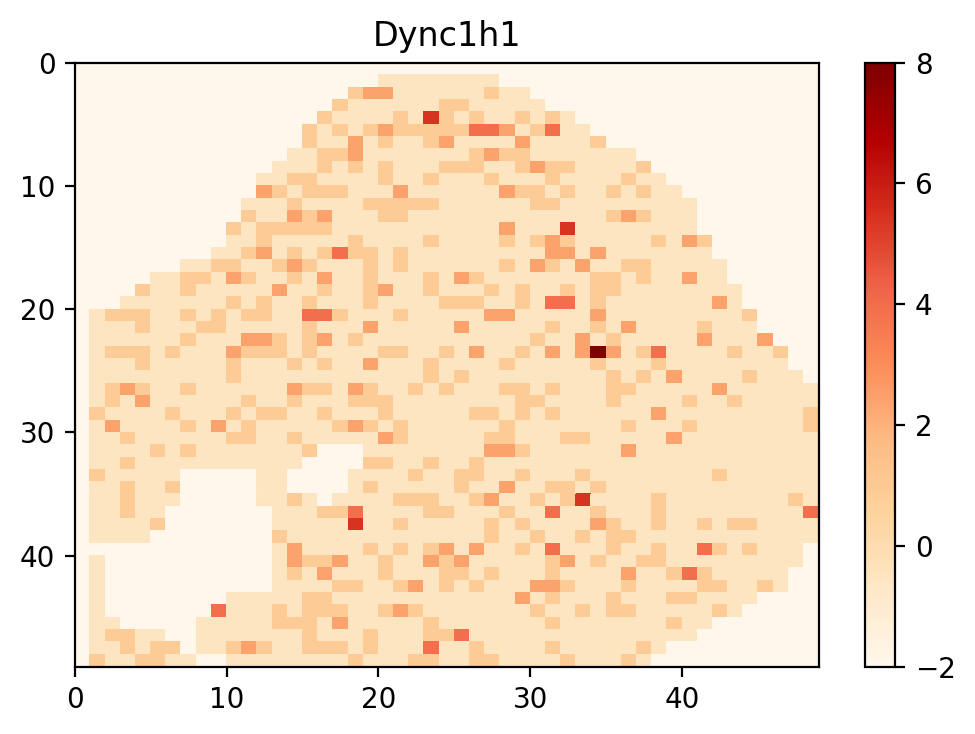

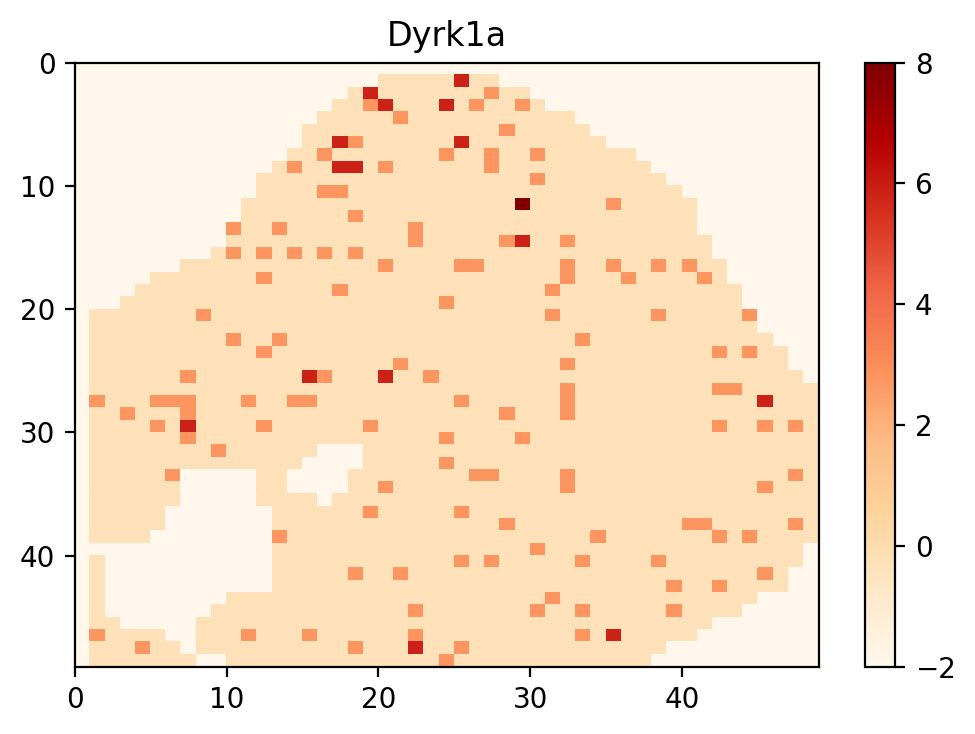

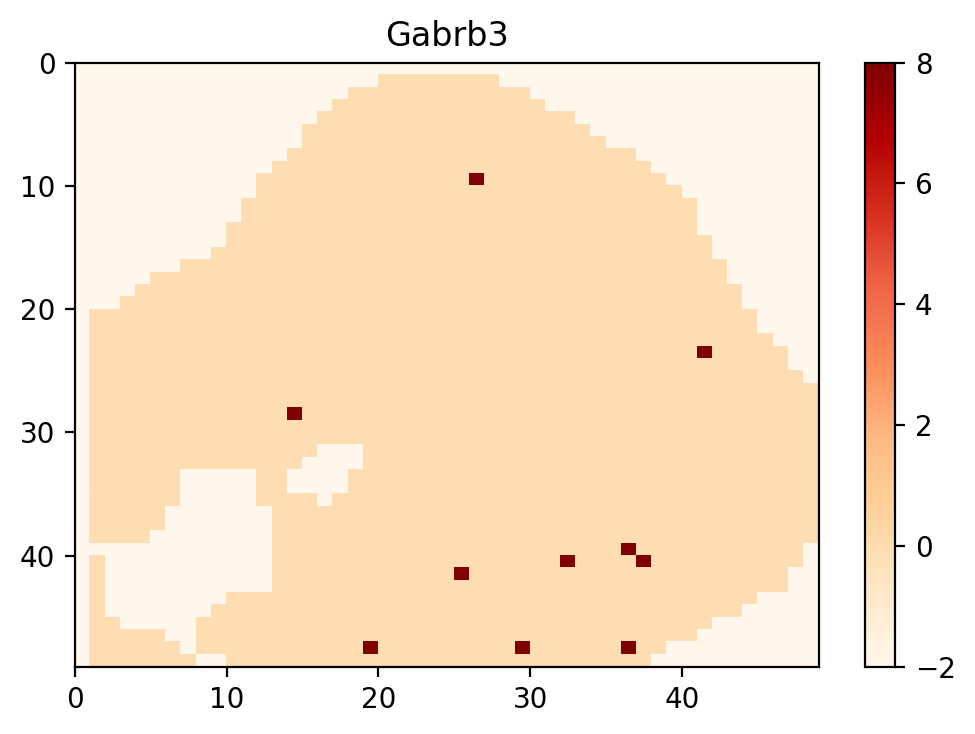

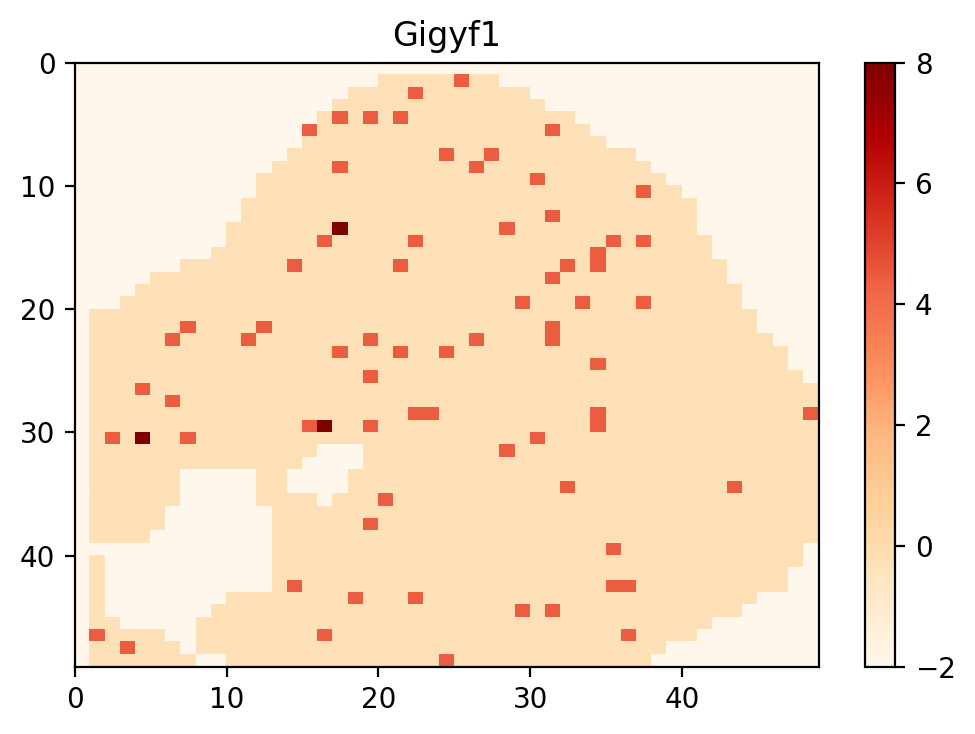

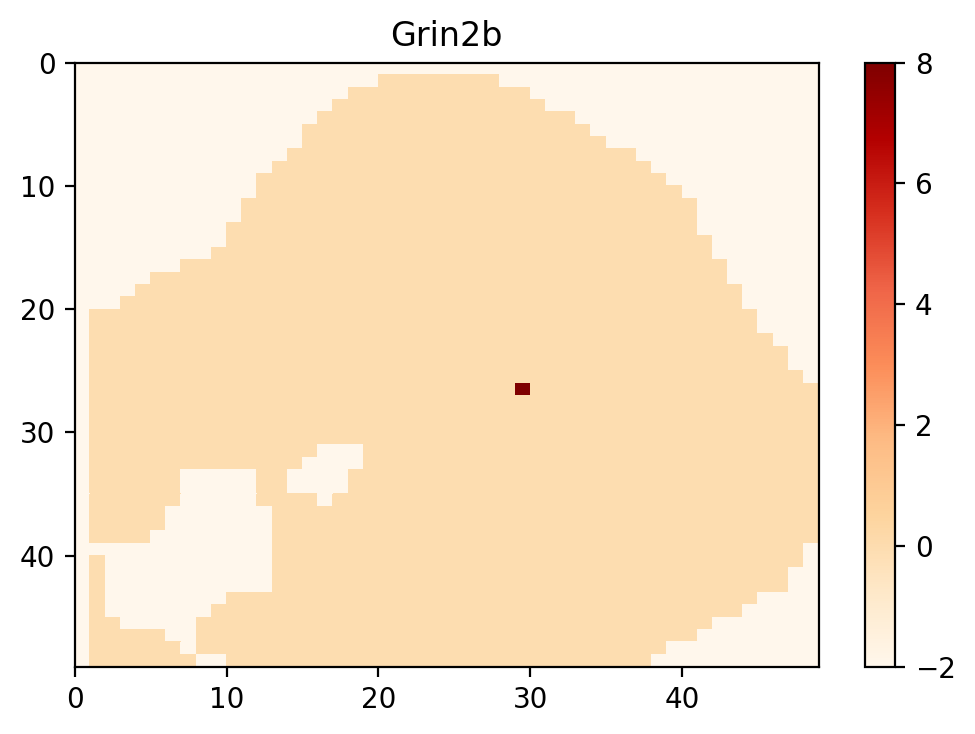

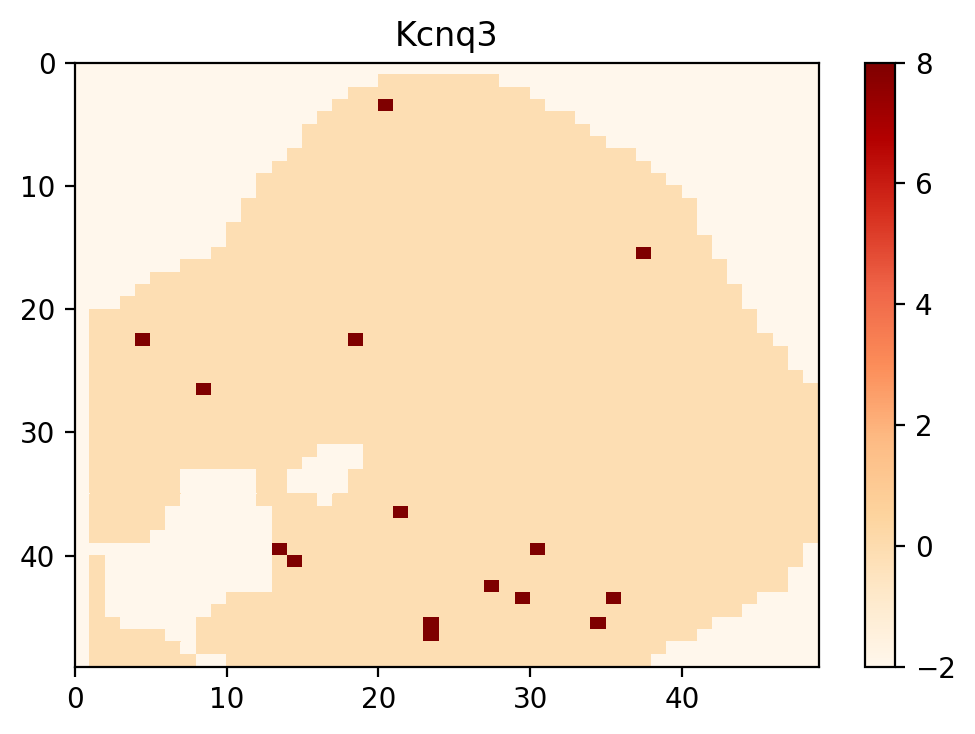

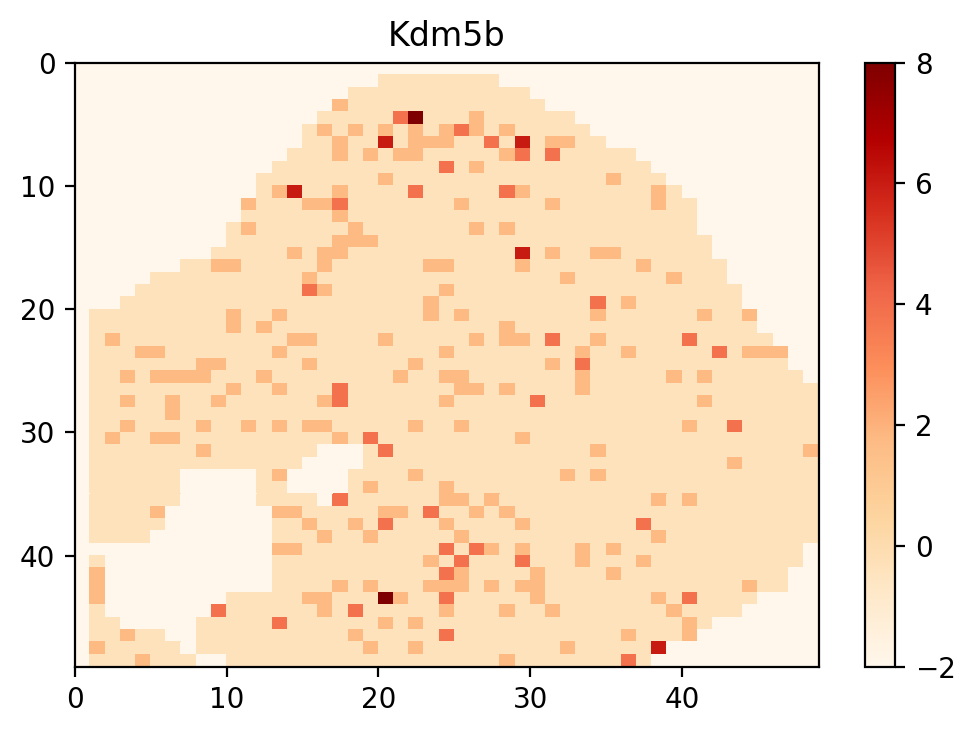

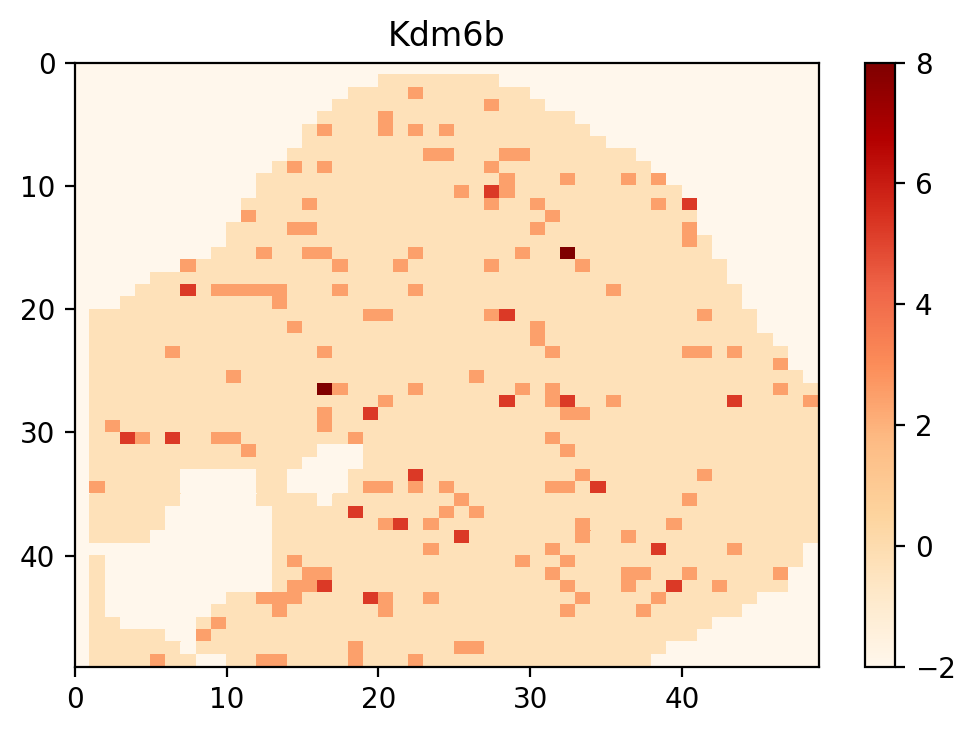

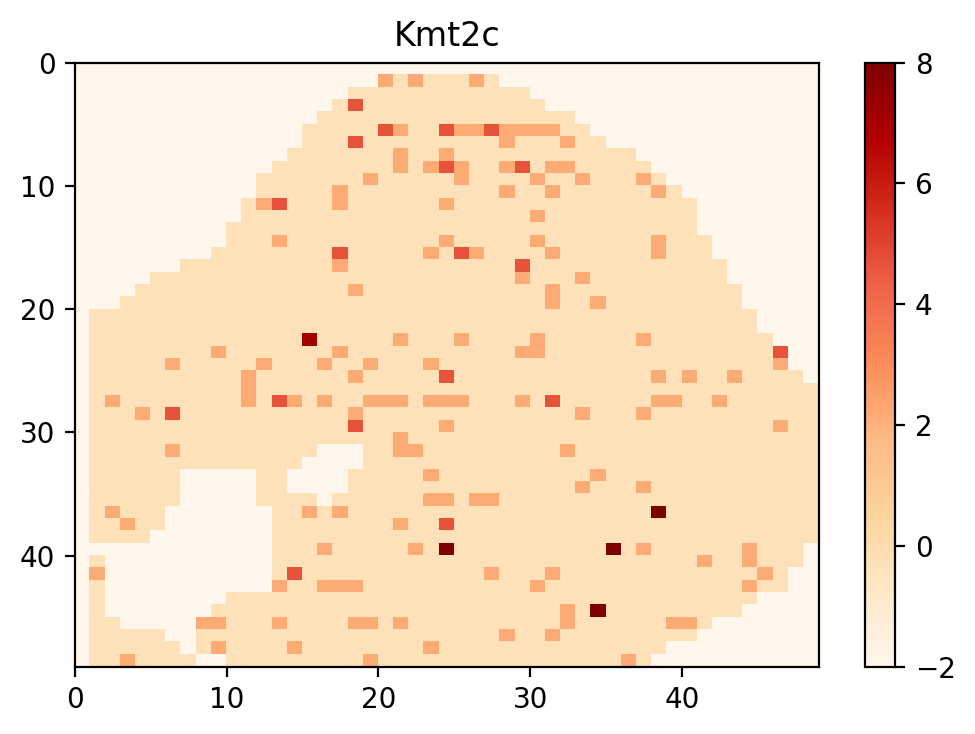

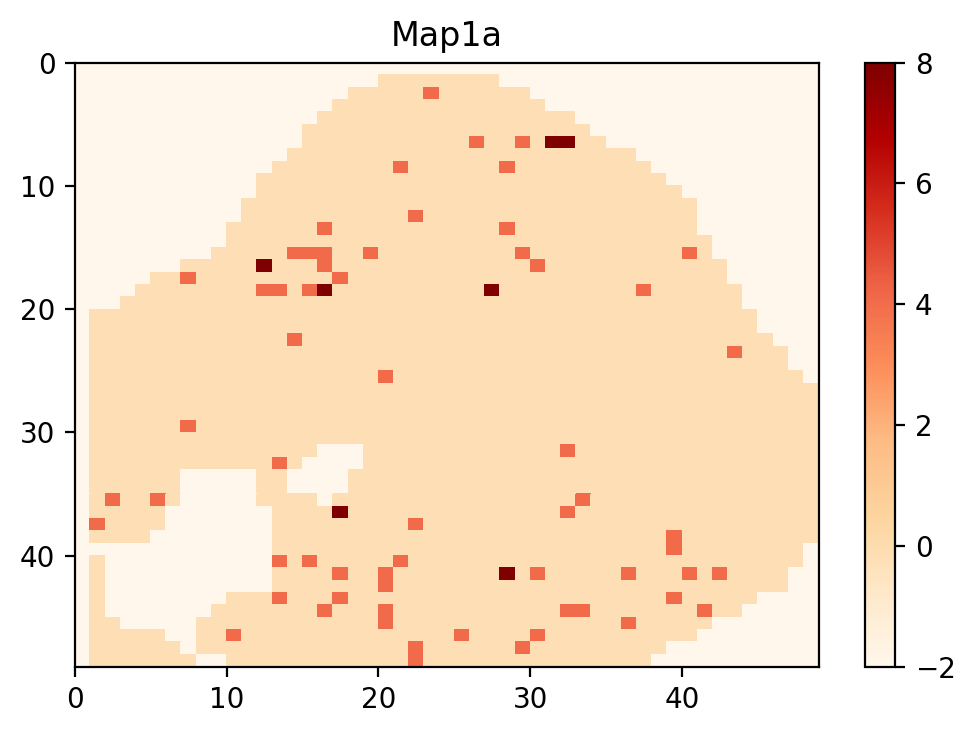

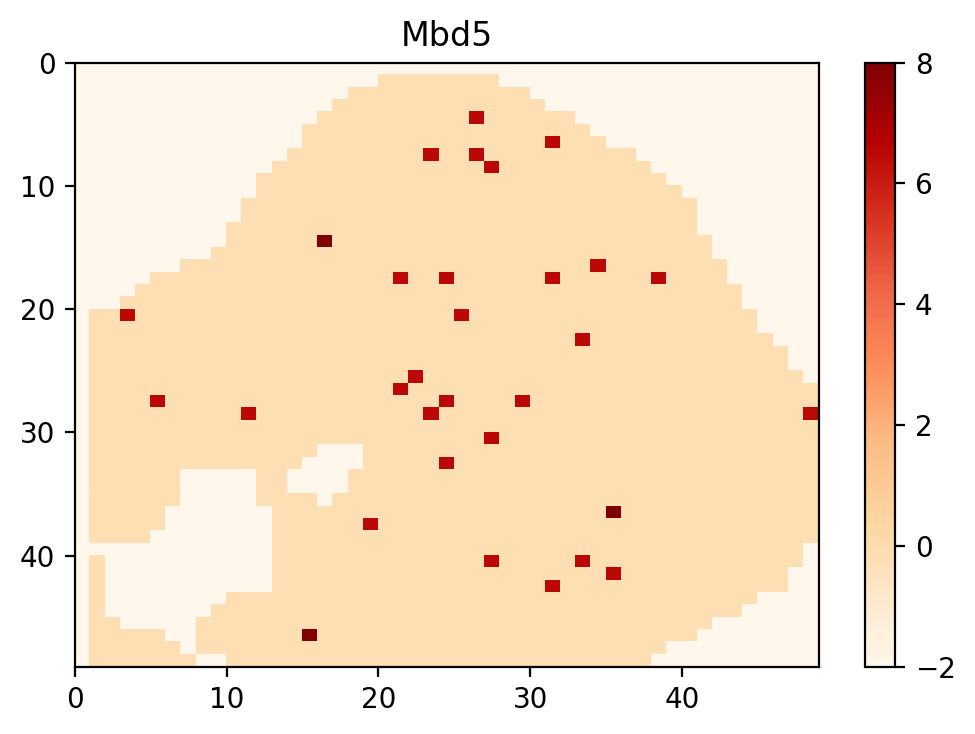

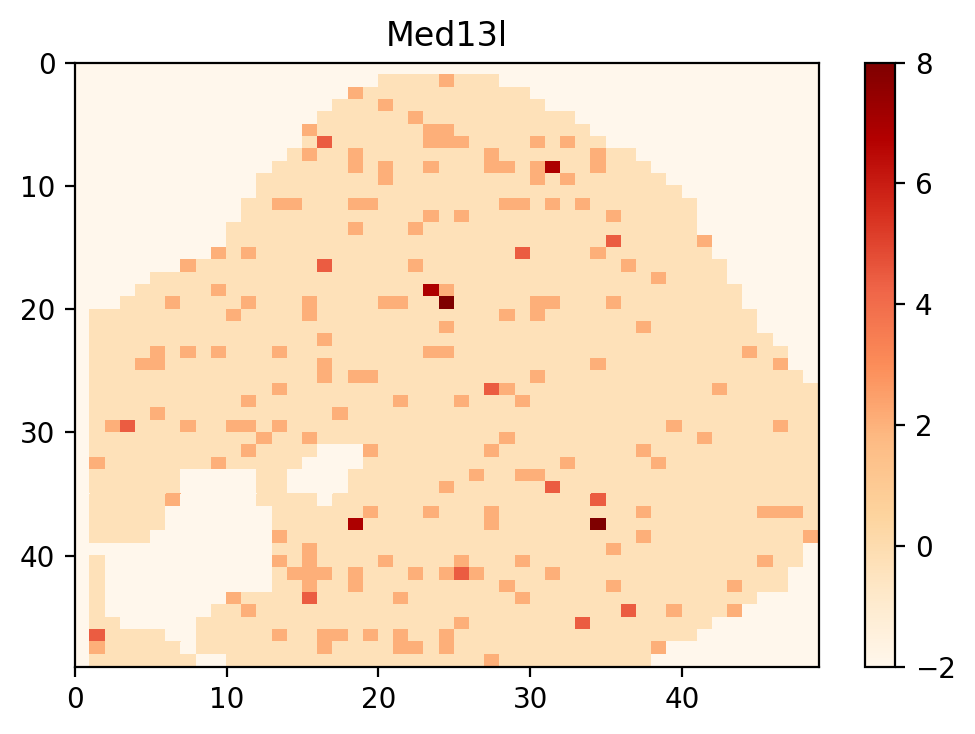

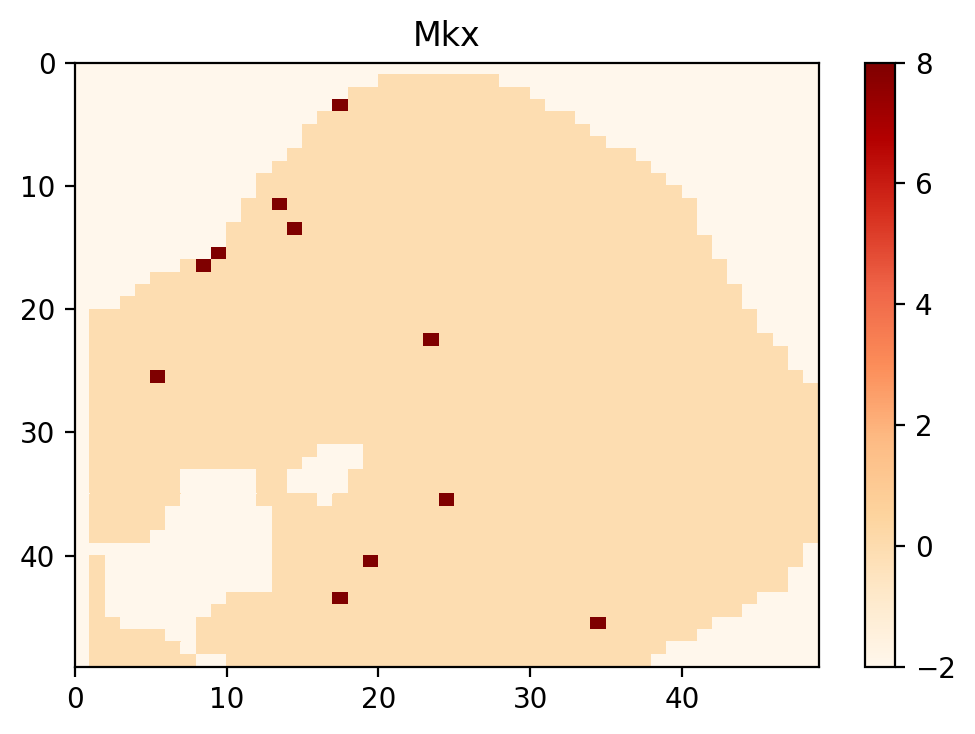

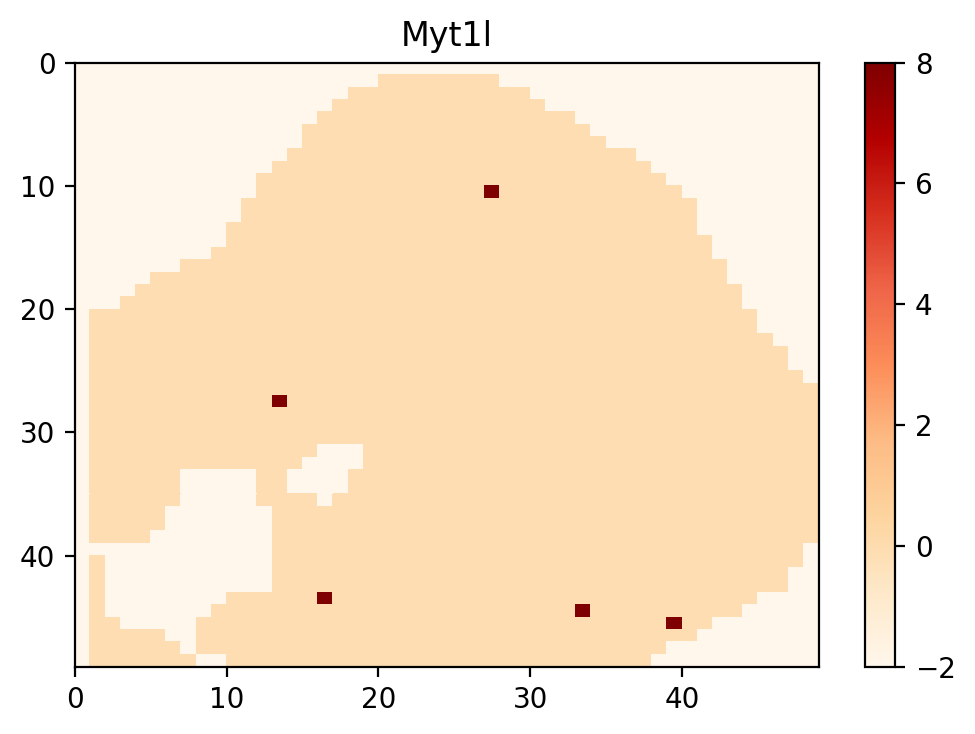

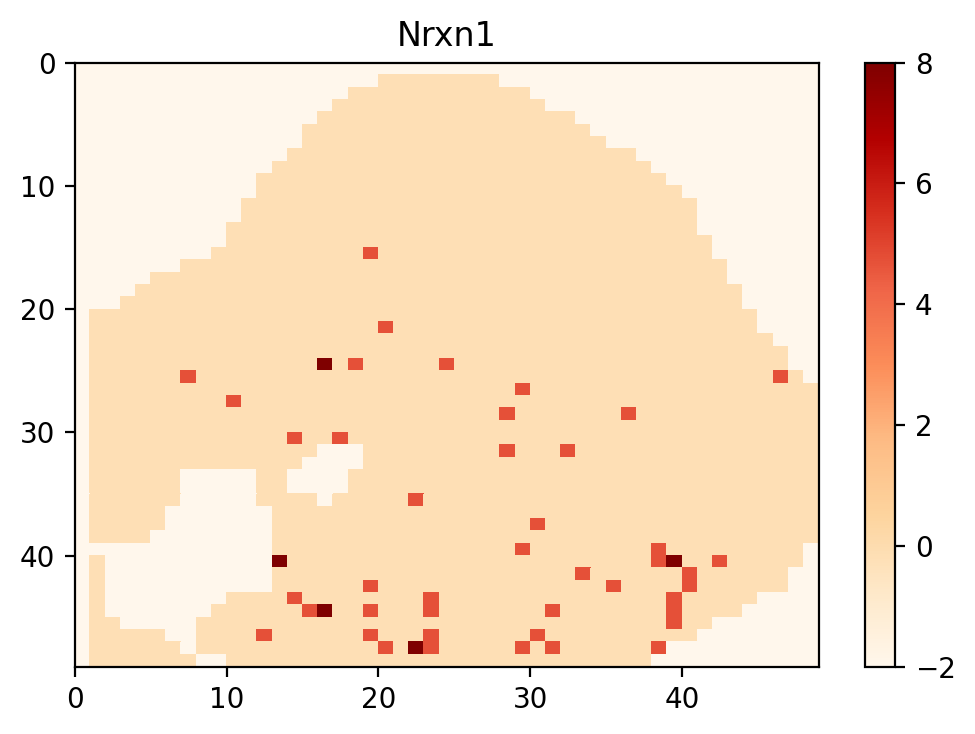

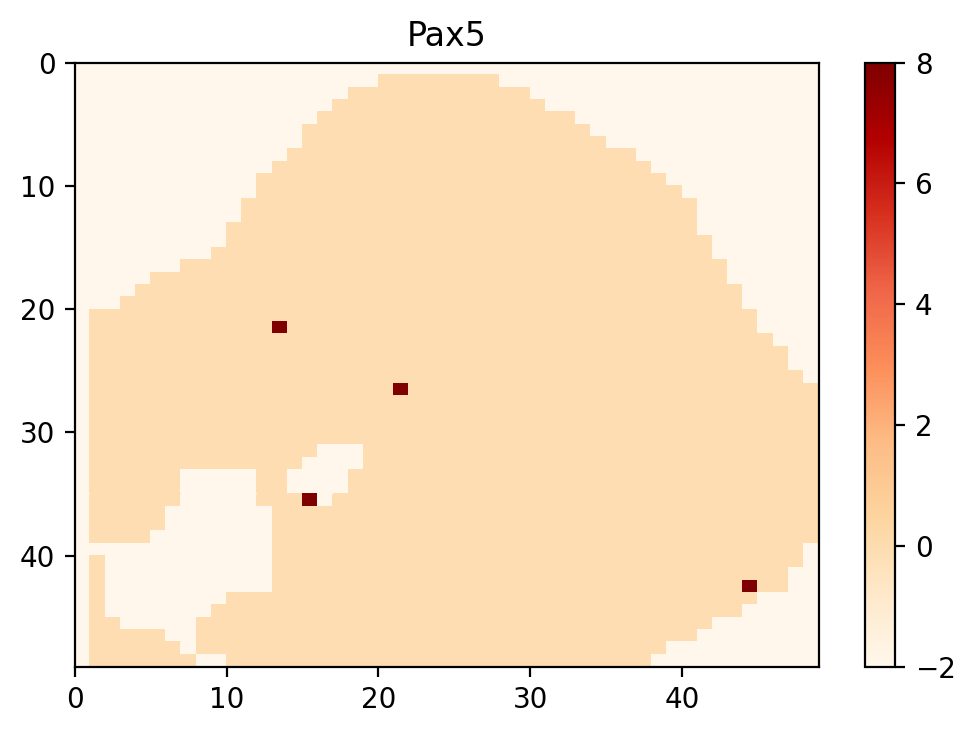

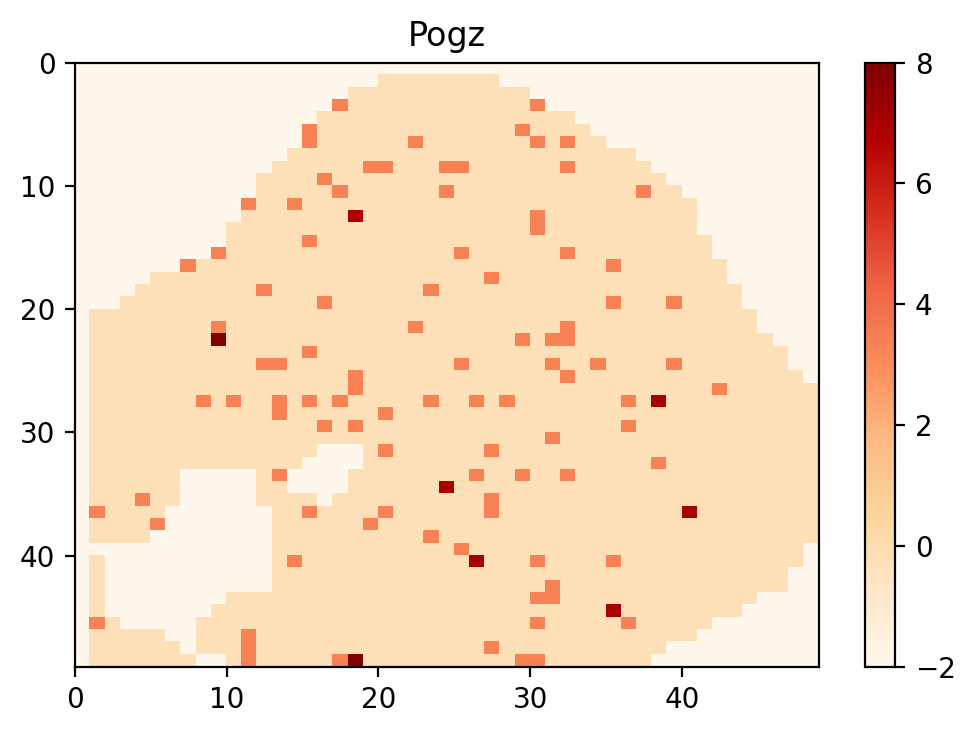

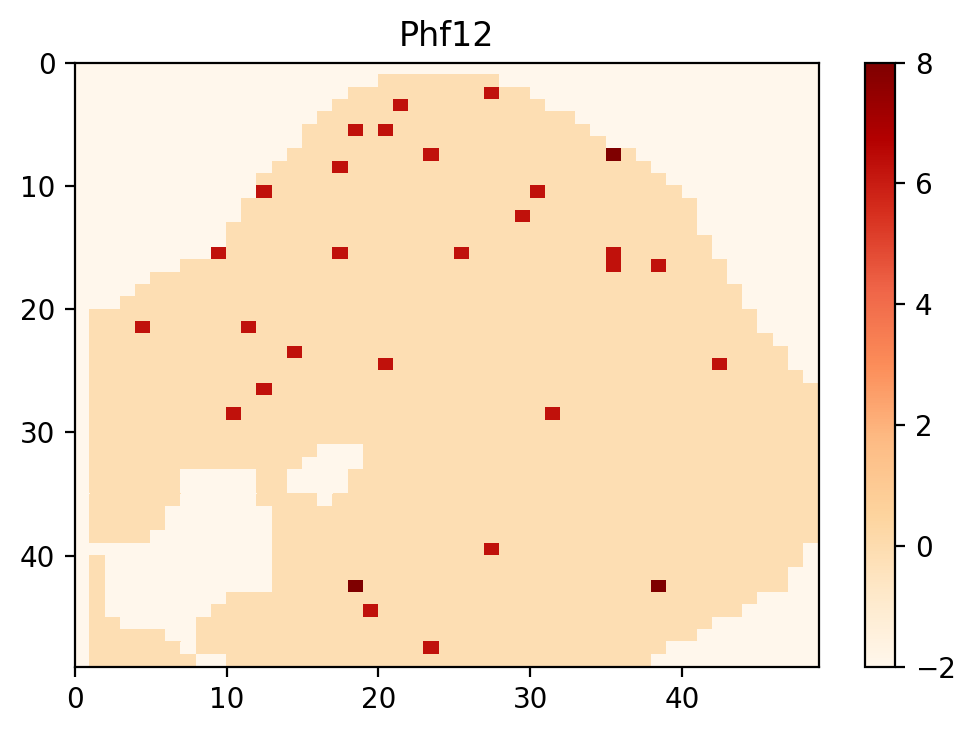

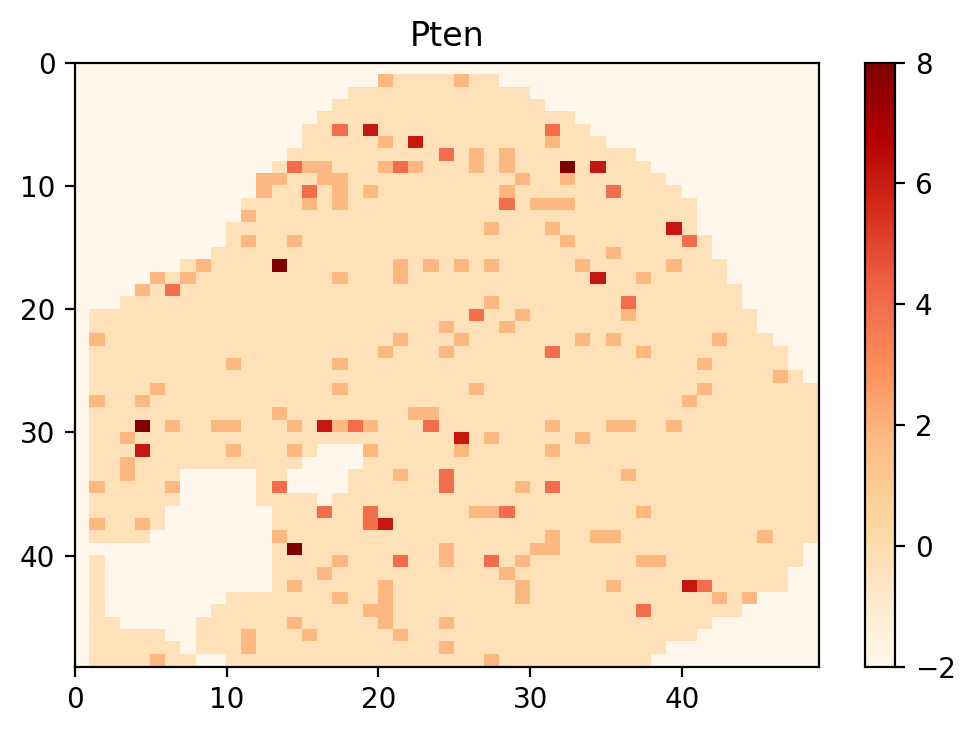

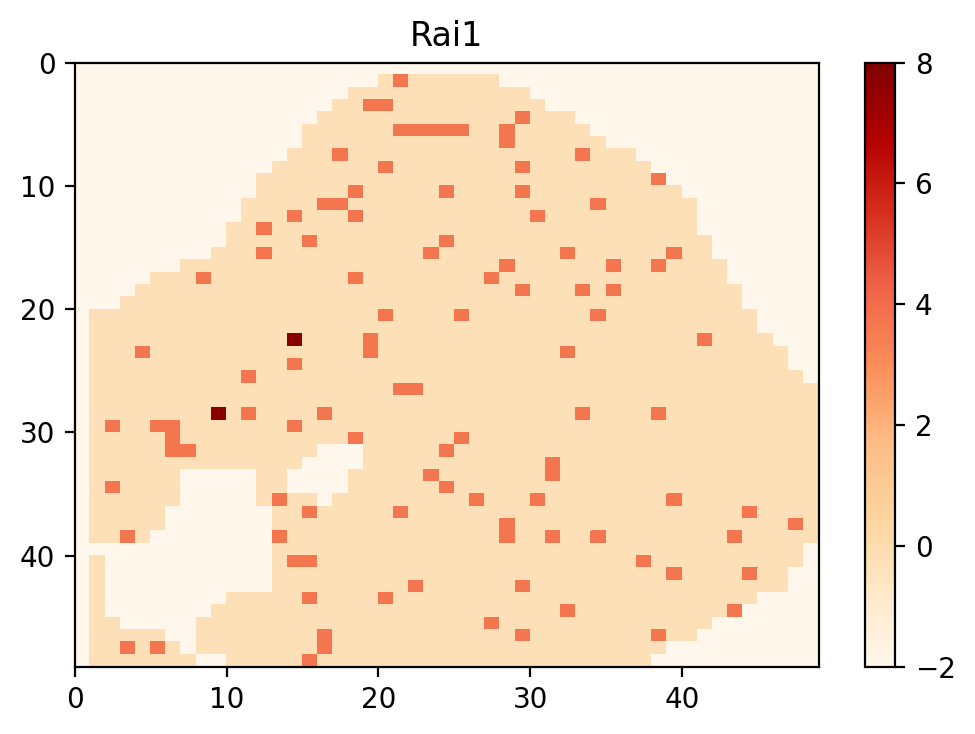

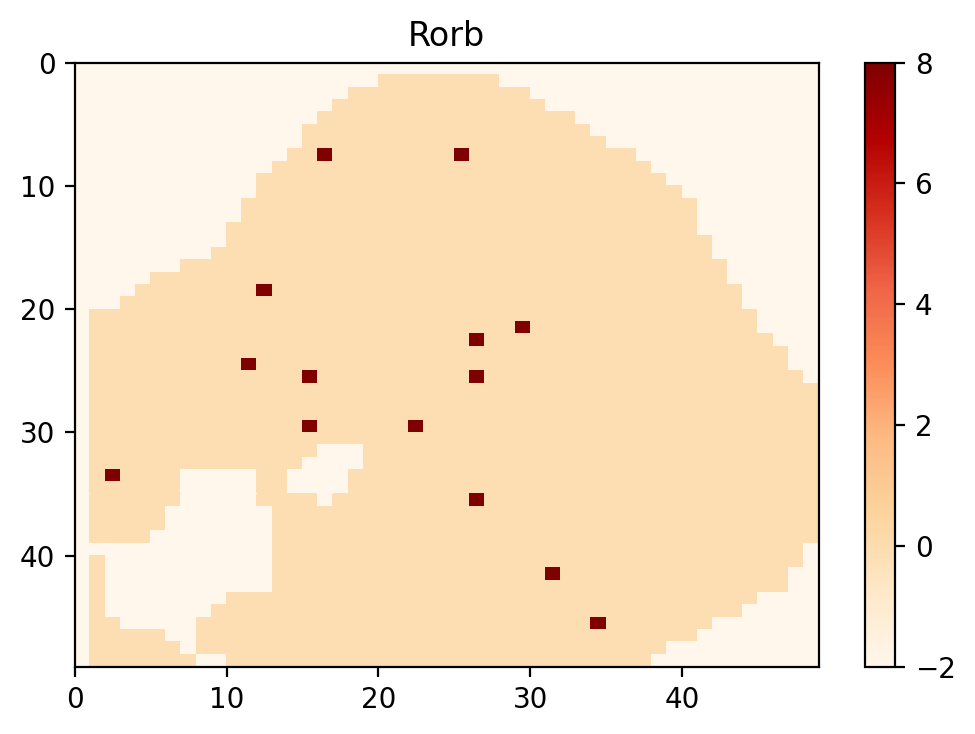

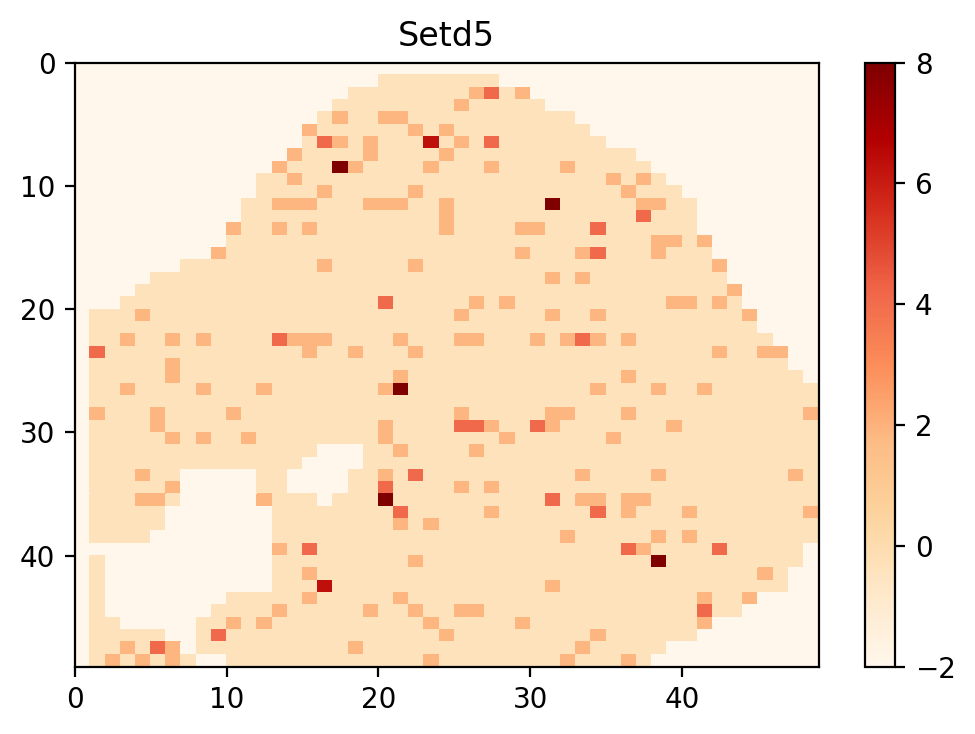

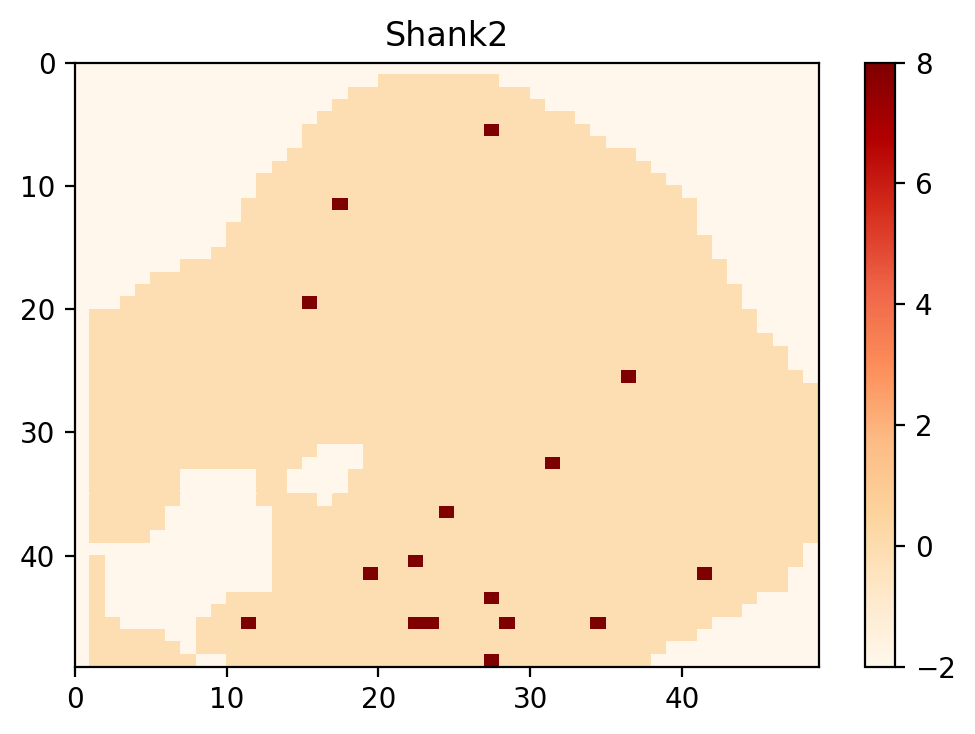

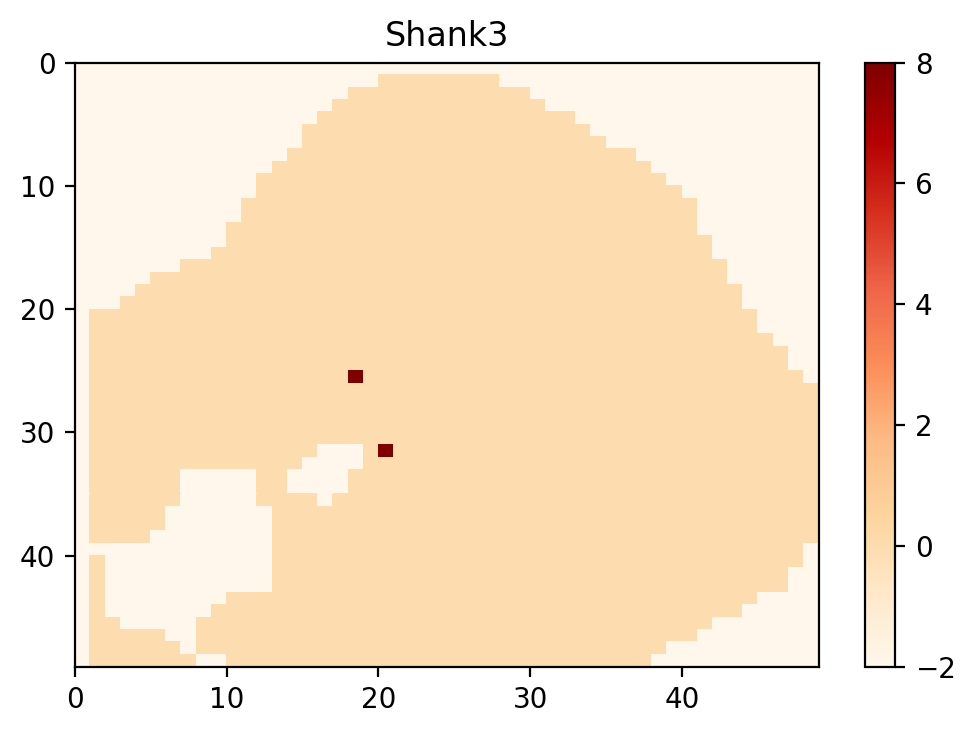

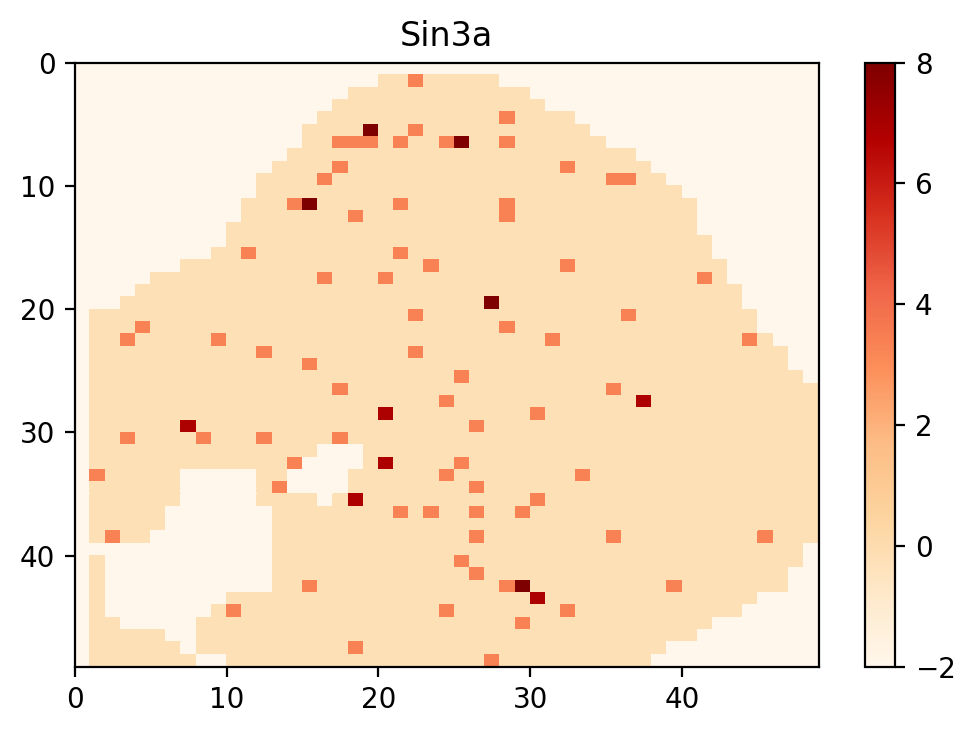

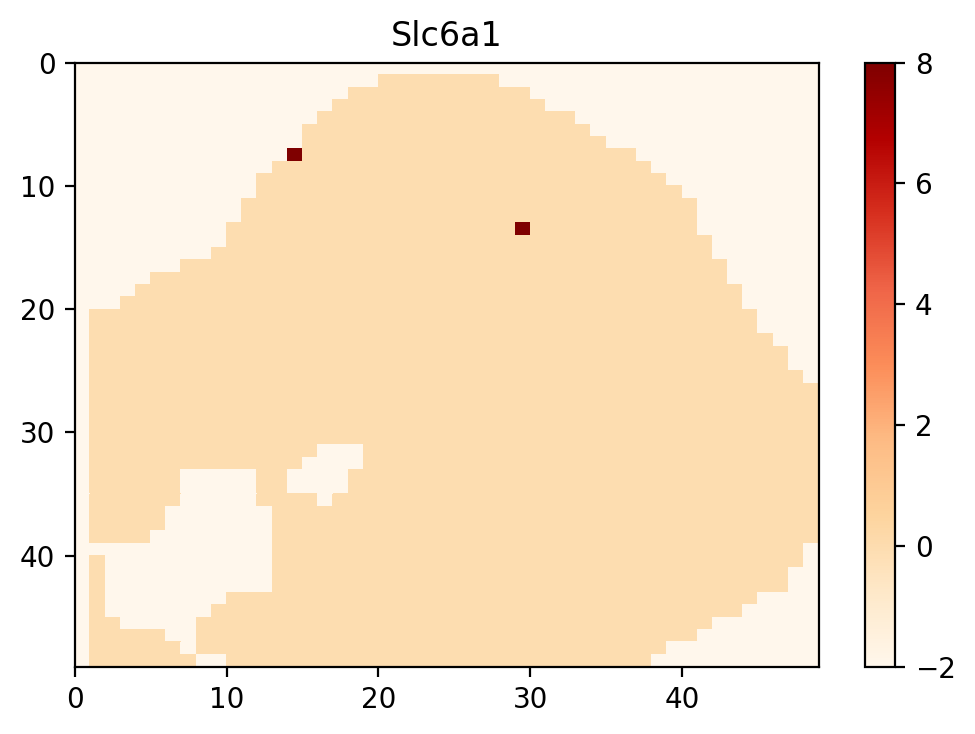

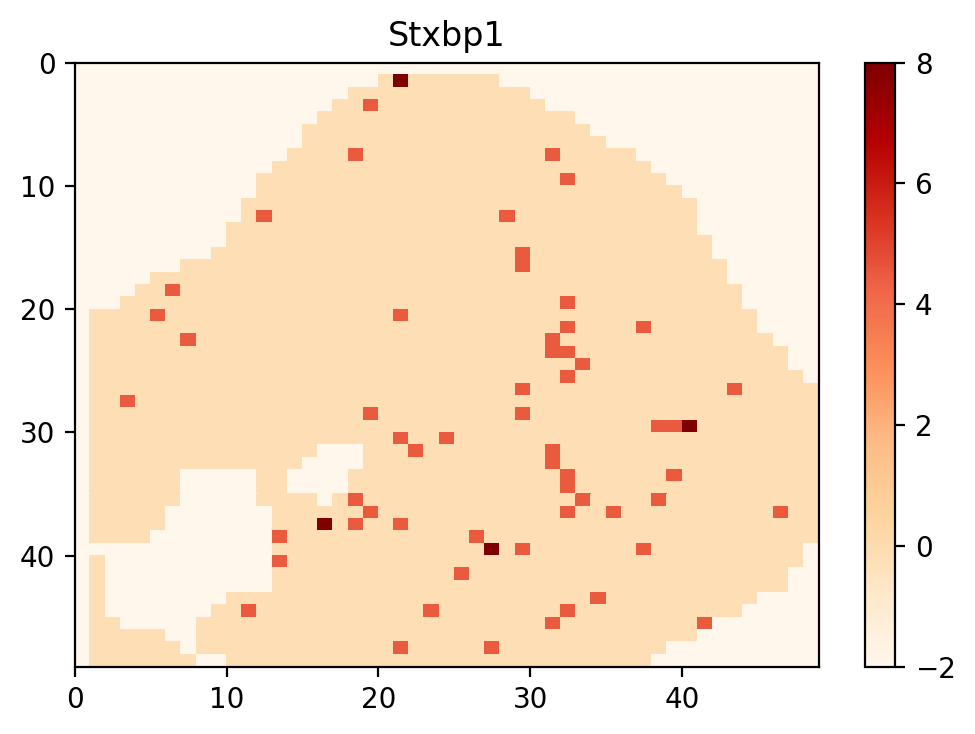

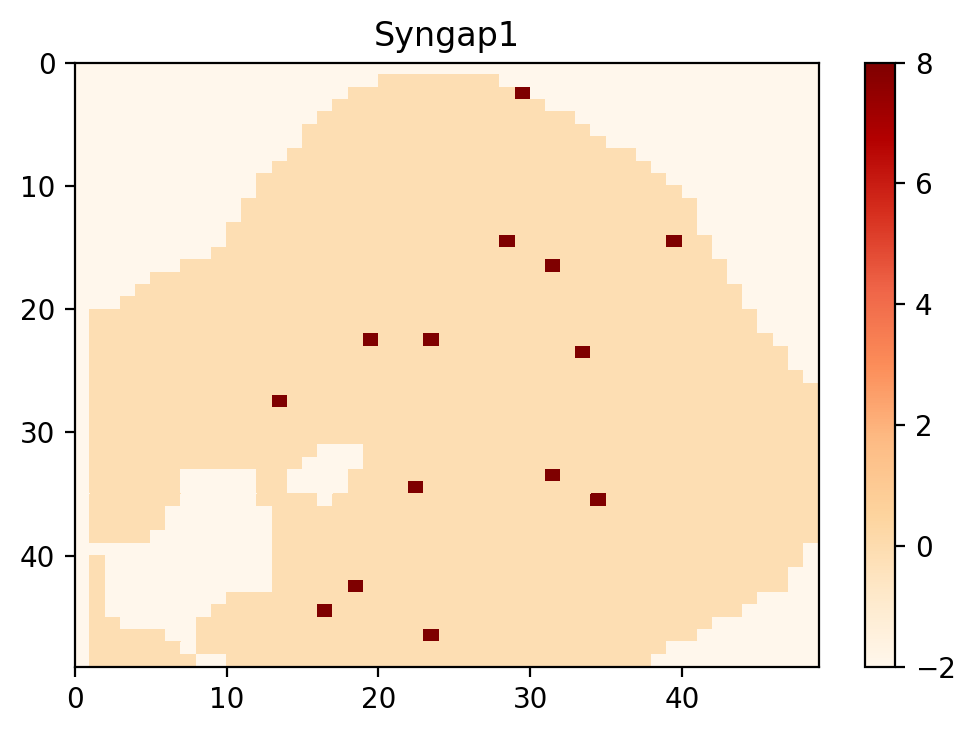

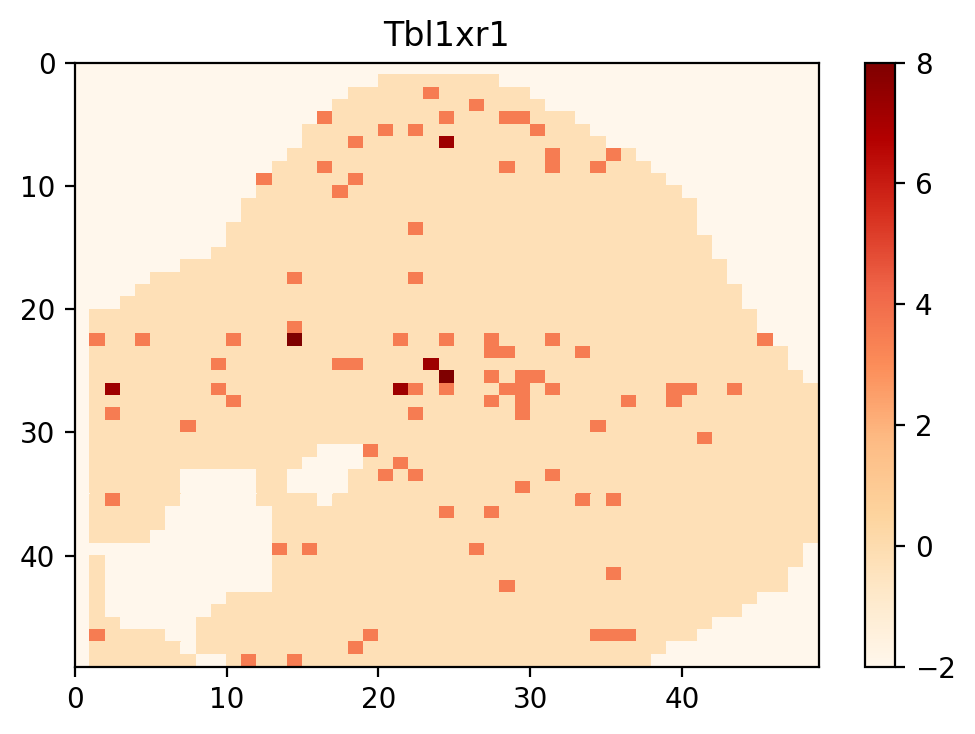

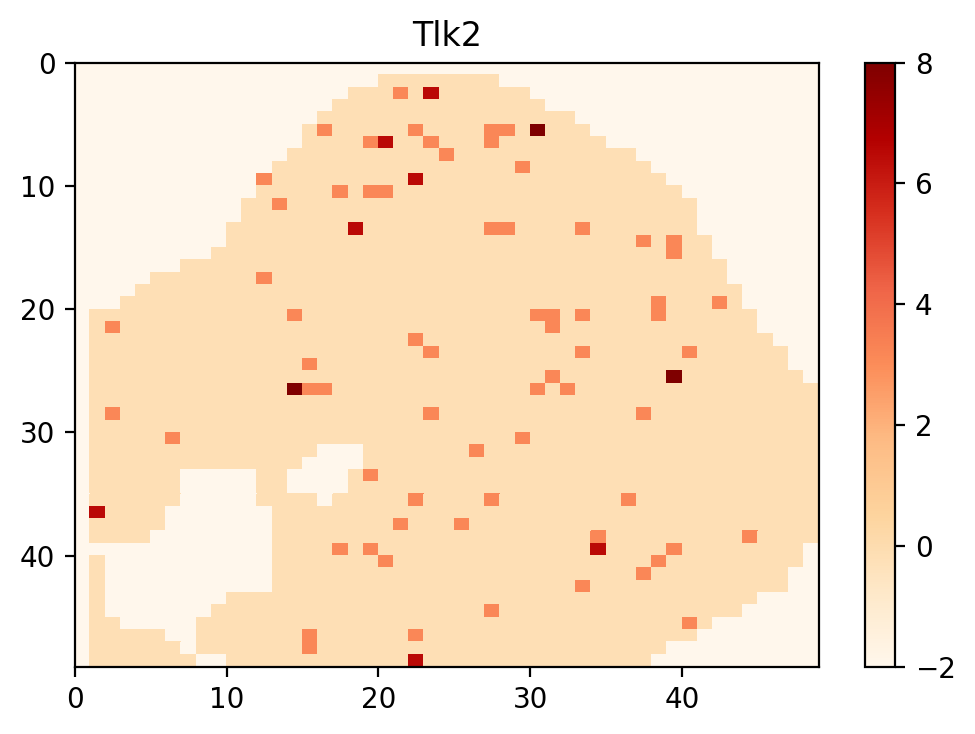

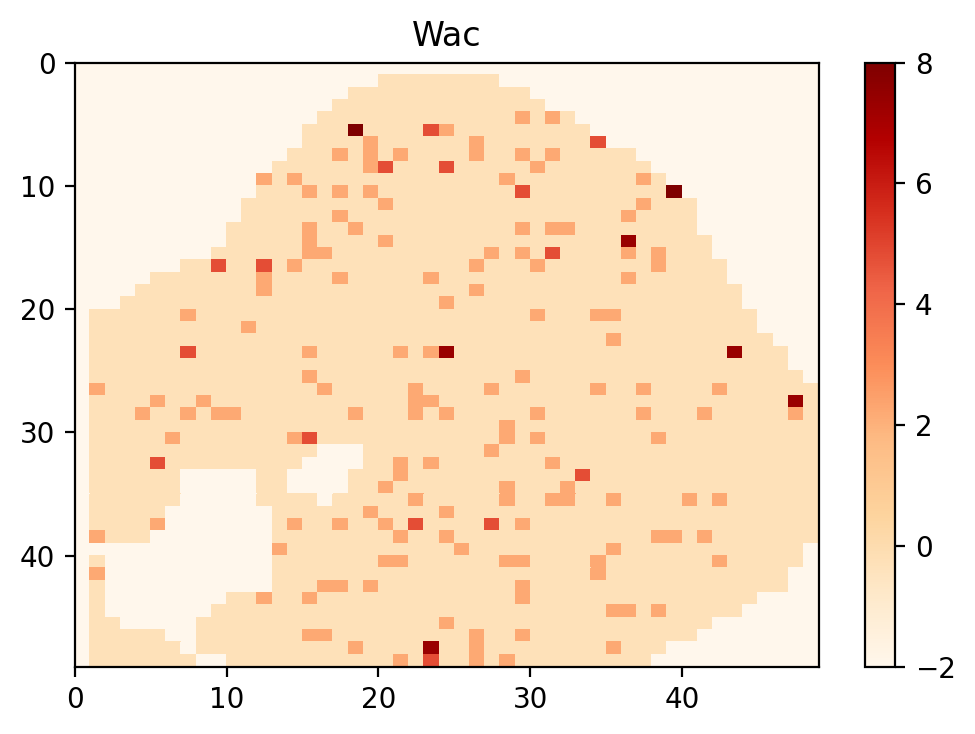

In [154]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('ASD_Genes.pdf')
for i, gene in enumerate(asd_asc_50_mouse):
    if gene in dataT.columns.values:
        Series = dataT[gene]
        plt = PlotGrid(Series, gene)
        pp.savefig()
    #except:
    #    print("Miss gene", gene)
    
    #if i > 2:
    #    break
pp.close()